# Credit Scorecard Notebook
- Author: Marcellinus Aditya Witarsah
- Date: 19 May 2024

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy import stats
from typing import Tuple
from typing import Union
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc

# About the Data
Table information about the dataset from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

# Load Data

In [2]:
# Load and inspect data
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Exploratory Data Analysis

## Univariate Analysis

### Target Proportion

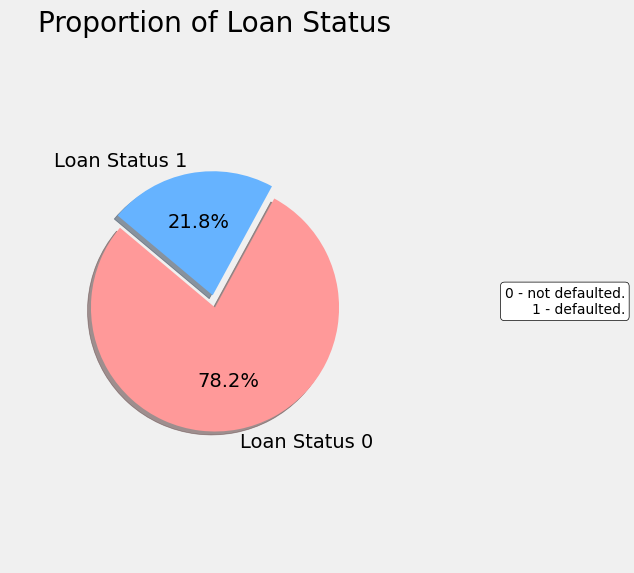

In [3]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["loan_status"].value_counts()

# Create labels and sizes for the pie chart
labels = ["Loan Status 0", "Loan Status 1"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of Loan Status")

# Add annotation
annotation = (
    "0 - not defaulted.\n"
    "1 - defaulted."
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.show()

### Missing Values

In [4]:
# Count percentage missing values
missing_values_count = df.isna().sum()
missing_values_count / len(df) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### Numerical

In [5]:
def plot_hist_box(df: pd.DataFrame, numerical_column: str) -> None:
    """
    Show distribution of numerical data by histogram plot and boxplot.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_column (str): numerical columns to be plotted
    Returns
    ------------
        None
    """
    _, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Histogram
    df[numerical_column].hist(ax=axes[0], bins=30, edgecolor='black')
    axes[0].set_title(f"Histogram of {numerical_column}")
    axes[0].set_xlabel(numerical_column)
    axes[0].set_ylabel("Frequency")

    # Boxplot
    df.boxplot(column=numerical_column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {numerical_column}")
    axes[1].set_xlabel(numerical_column)
    axes[1].set_ylabel("Value")

    # Show plots
    plt.tight_layout()
    plt.show()

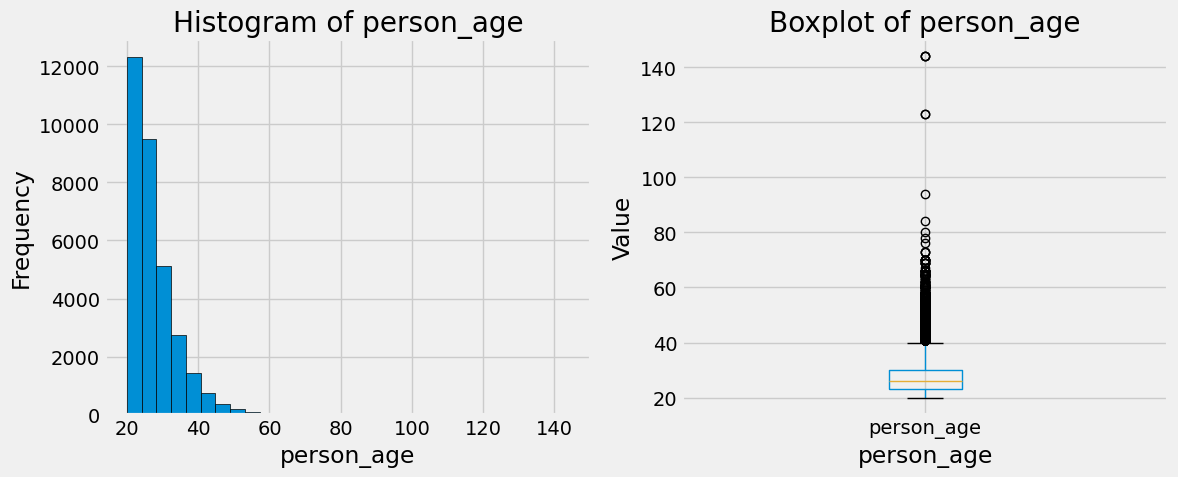

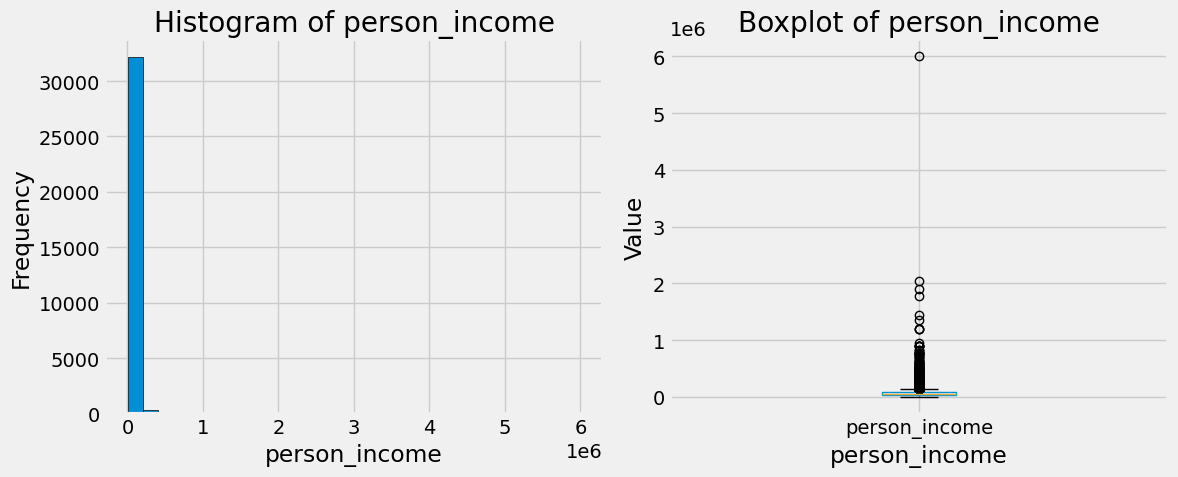

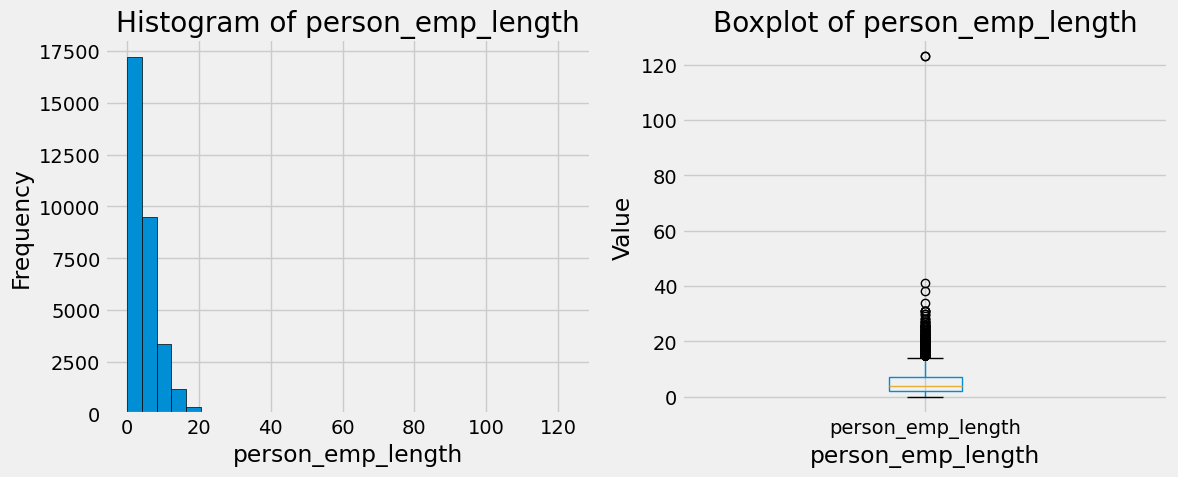

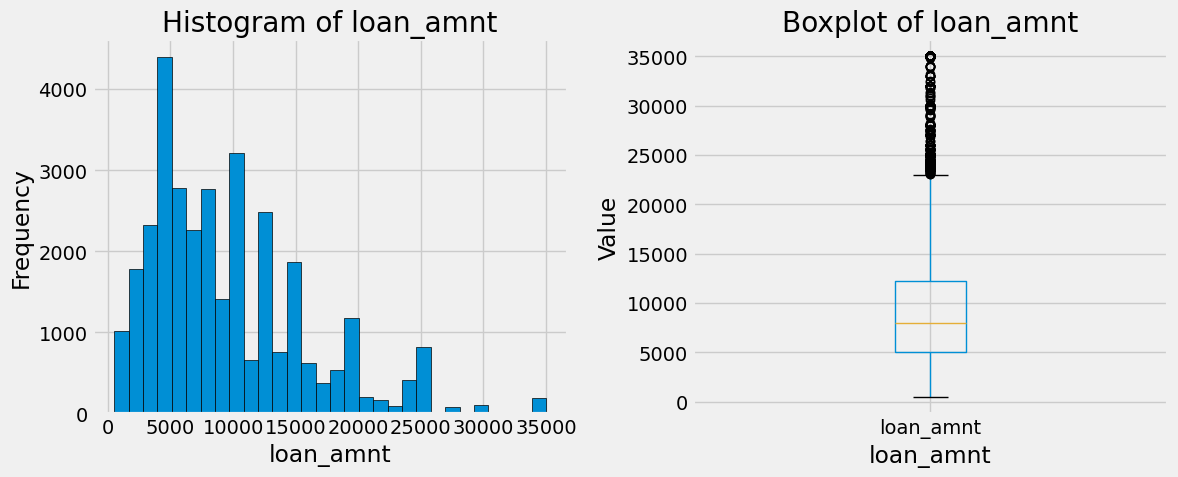

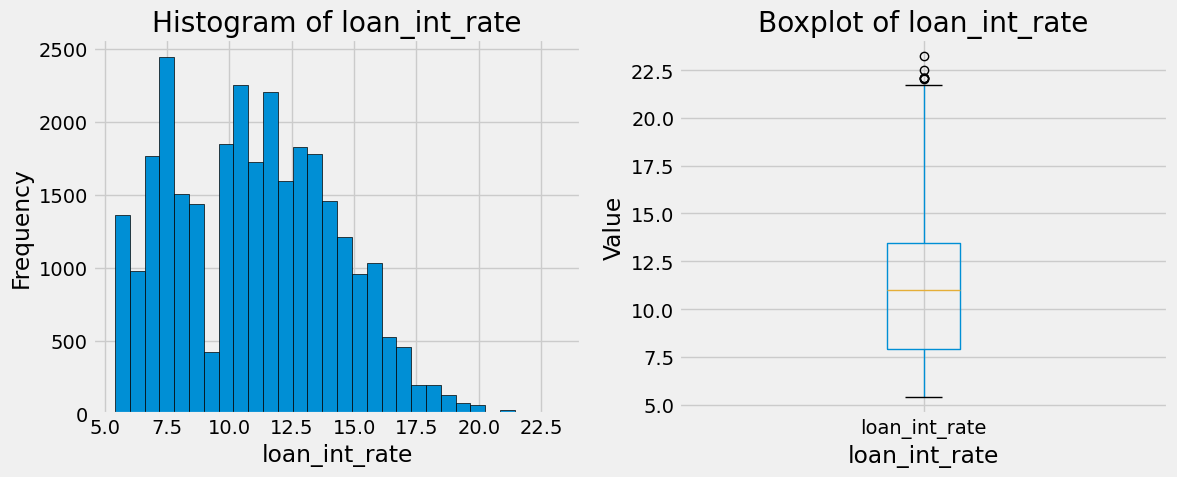

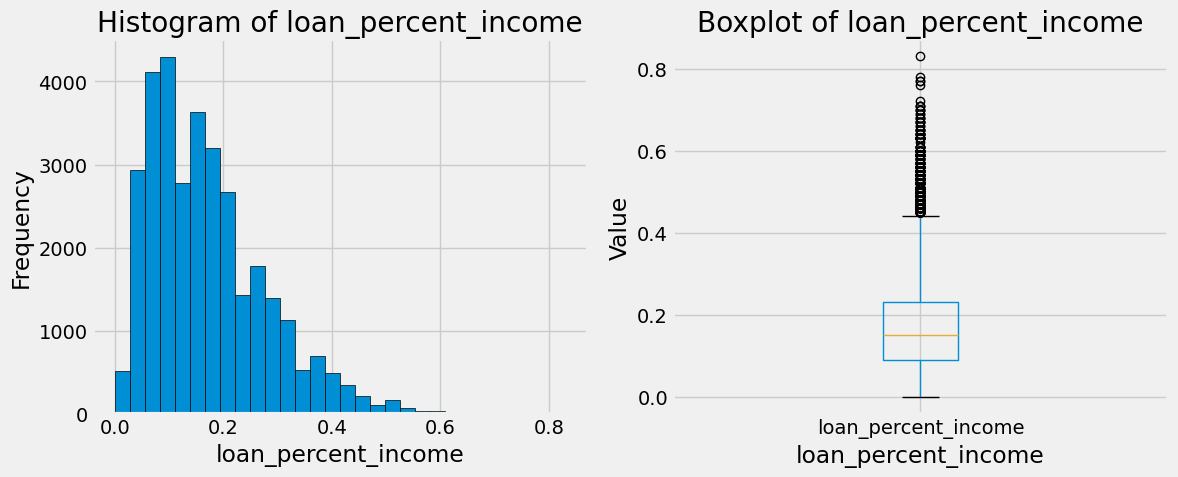

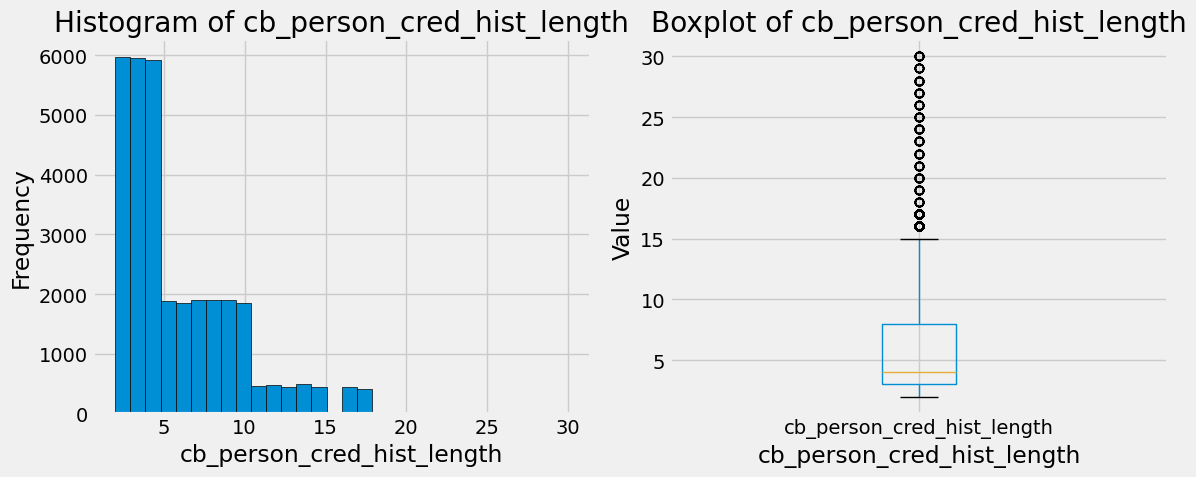

In [6]:
# Plot histogram and boxplot
numerical_columns = df.select_dtypes("number").columns  # Get the numerical columns

plt.style.use('fivethirtyeight')
for numerical_column in numerical_columns:
    if numerical_column != "loan_status":
        plot_hist_box(df, numerical_column)

Suspected outliers inside of the `person_age` where the longest people who ever lived was 122 years old.

In [7]:
df[df["person_age"] > 120]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Looking at the data the numbers seems authentic. But in real life we might need to confirm about this.

### Categorical

In [8]:
def plot_count_categorical(df: pd.DataFrame, categorical_column: str) -> None:
    """
    Show number of occurences of each categorical column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_column (str): The numerical column to be plotted.
        categorical_column (str): categorical columns to be plotted
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=(8, 6))  # Create a figure

    # Bar plot
    df[categorical_column].value_counts().plot(kind='barh', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_column}")
    ax.set_xlabel(categorical_column)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()

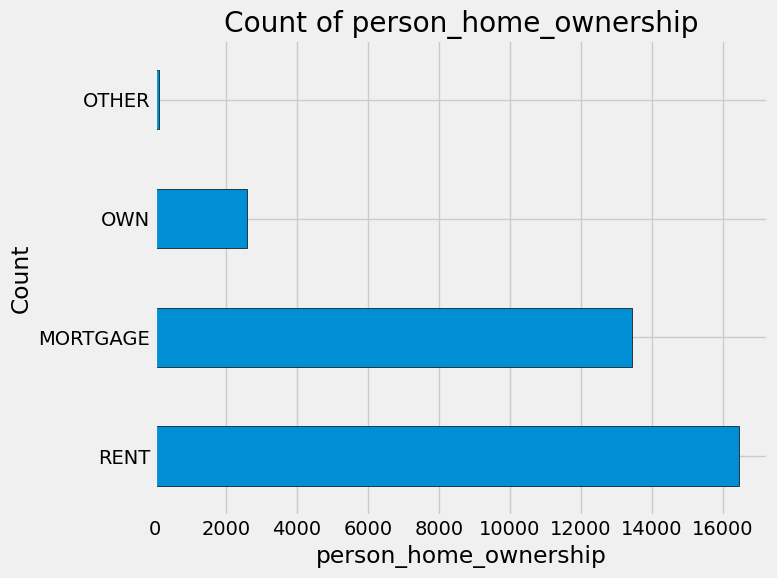

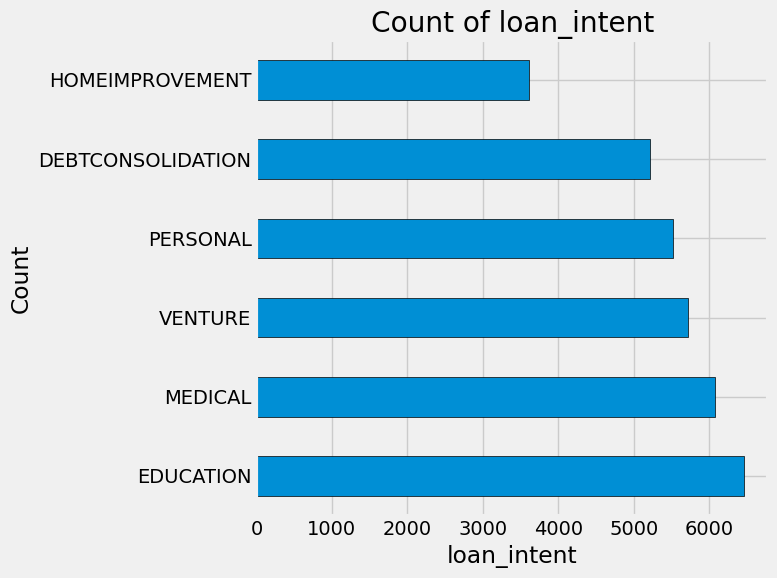

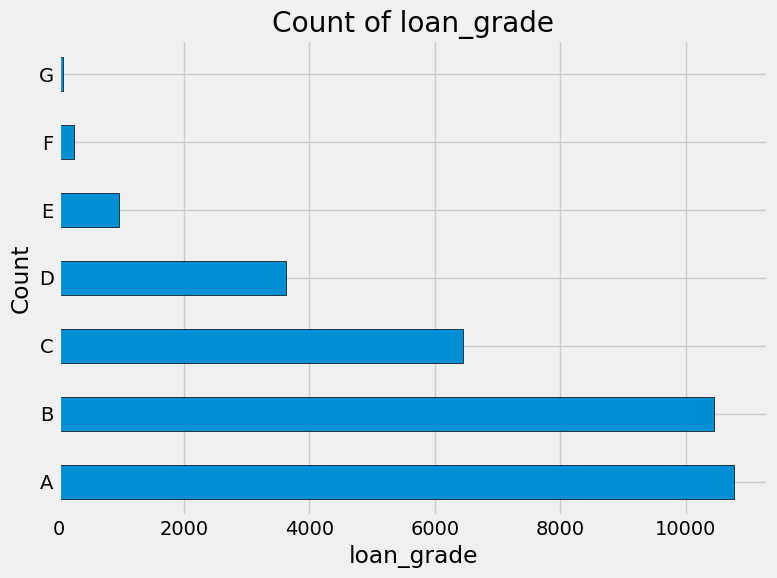

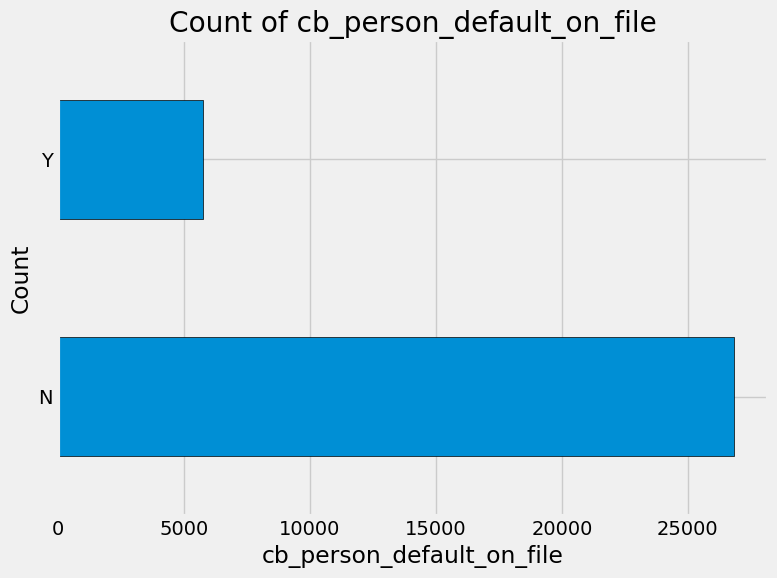

In [9]:
categorical_columns = df.select_dtypes("object").columns  # Get categorical columns

plt.style.use('fivethirtyeight')
for categorical_column in categorical_columns:
    plot_count_categorical(df, categorical_column)

## Multivariate Analysis

### Numerical vs Target

In [10]:
def plot_dist_numerical_by_target(df: pd.DataFrame, numerical_column: str, target_column: str) -> None:
    """
    Show distribution and boxplot of a numerical column, grouped by a target column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        numerical_column (str): The numerical column to be plotted.
        target_column (str): The target column for grouping.
    Returns
    ------------
        None
    """
    _, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

    # KDE plot with hue
    for target_value in df[target_column].unique():
        sns.kdeplot(data=df[df[target_column]==target_value], x=numerical_column, ax=axes[0], label=f"{target_column} {target_value}")
    axes[0].set_title(f"Distribution of {numerical_column} by {target_column}")
    axes[0].set_xlabel(numerical_column)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Boxplot with hue
    sns.boxplot(data=df, x=target_column, y=numerical_column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {numerical_column} by {target_column}")
    axes[1].set_xlabel(target_column)
    axes[1].set_ylabel(numerical_column)

    # Show plots
    plt.tight_layout()
    plt.show()


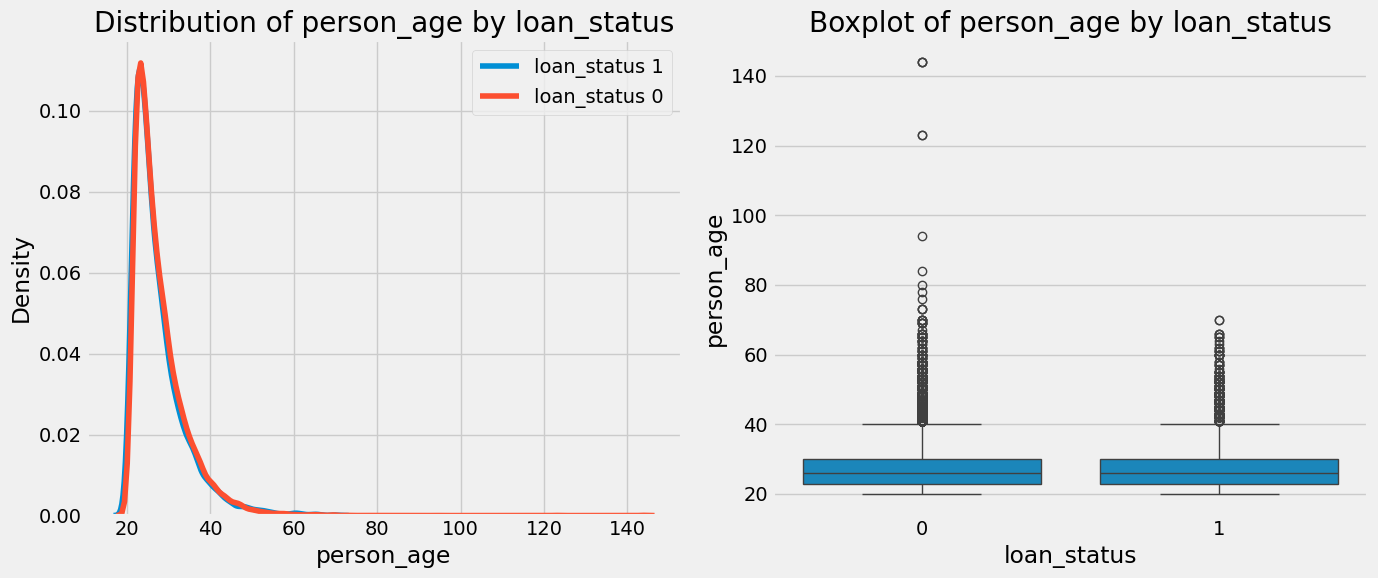

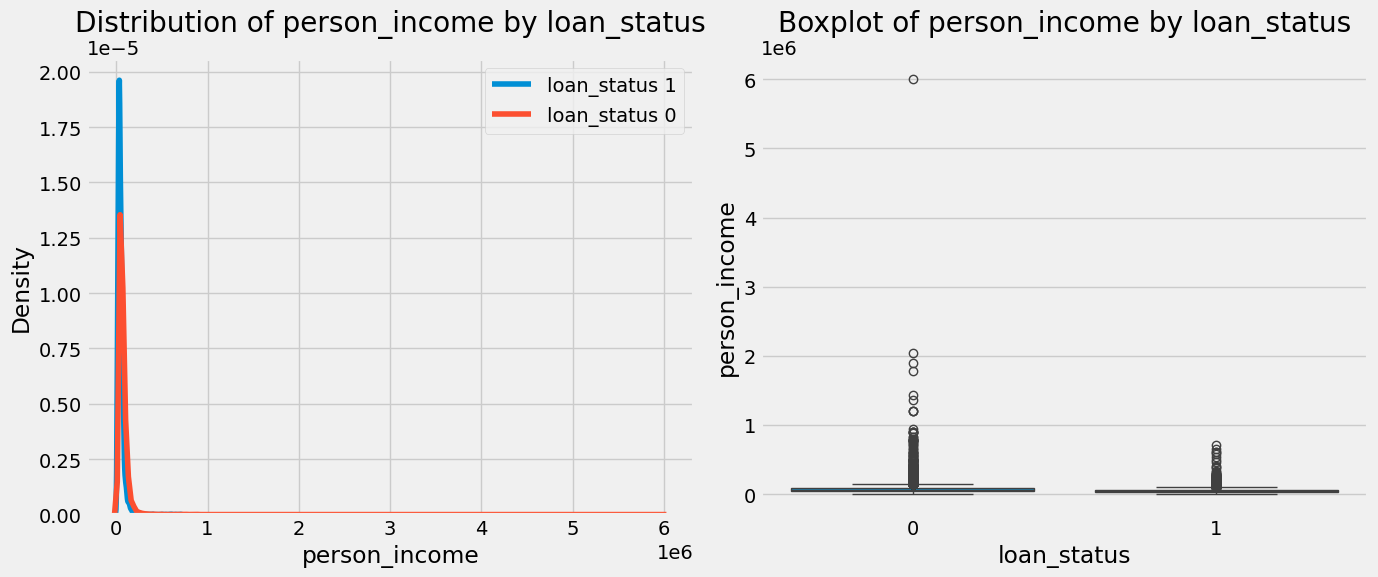

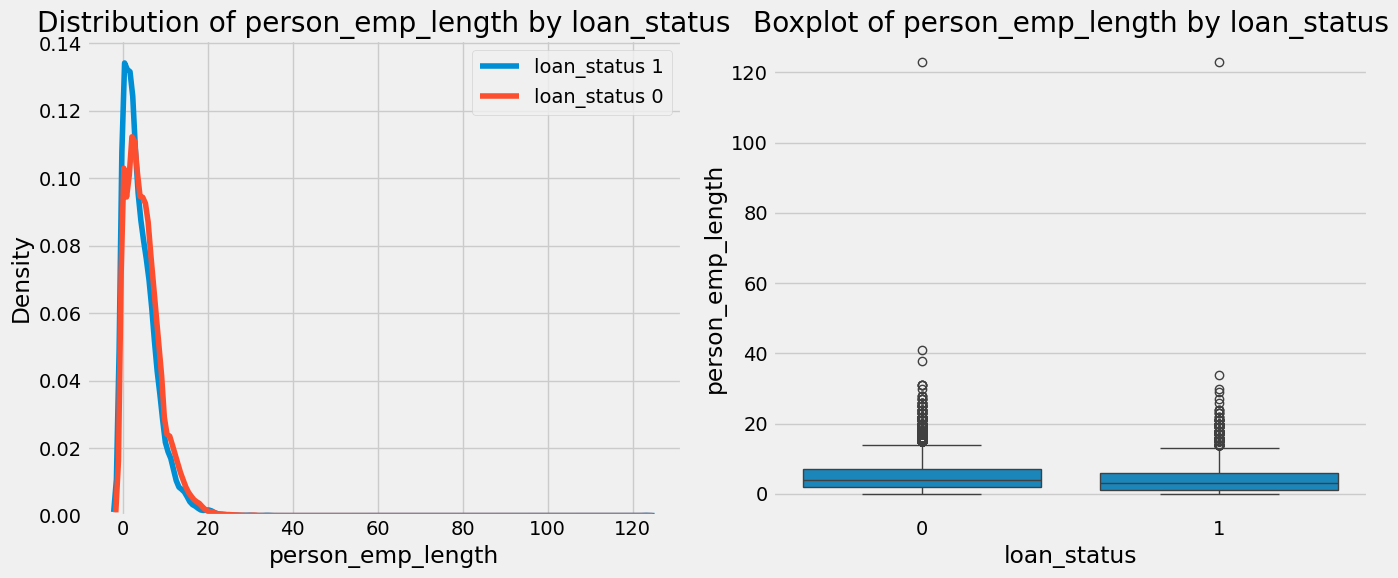

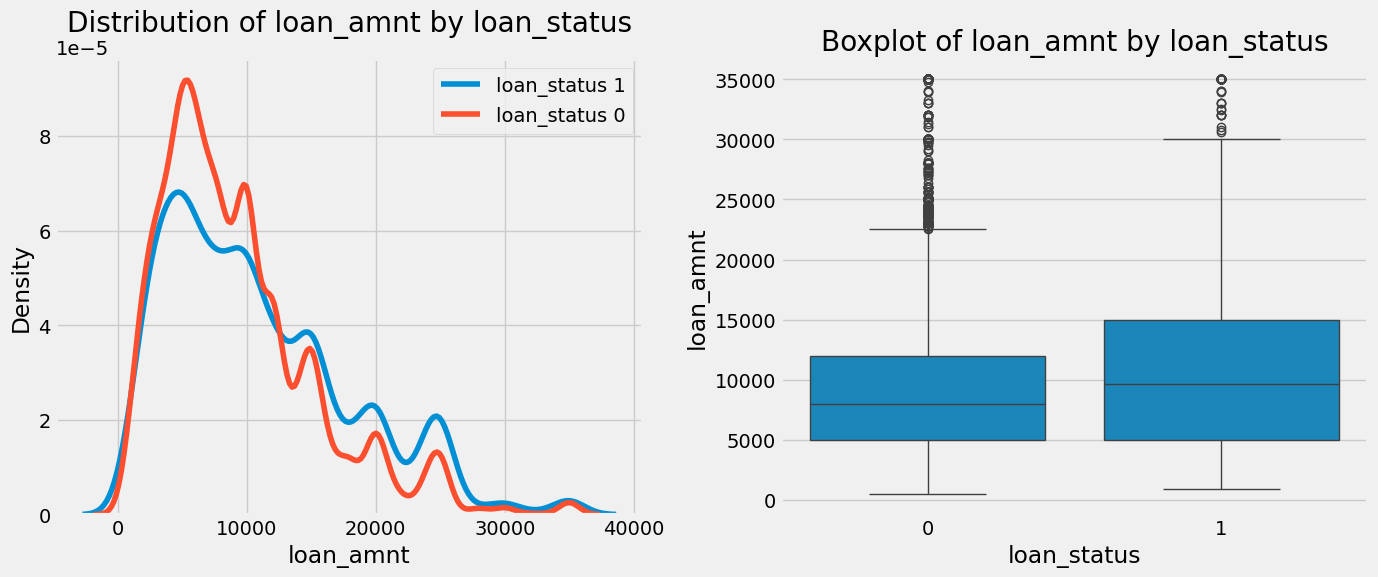

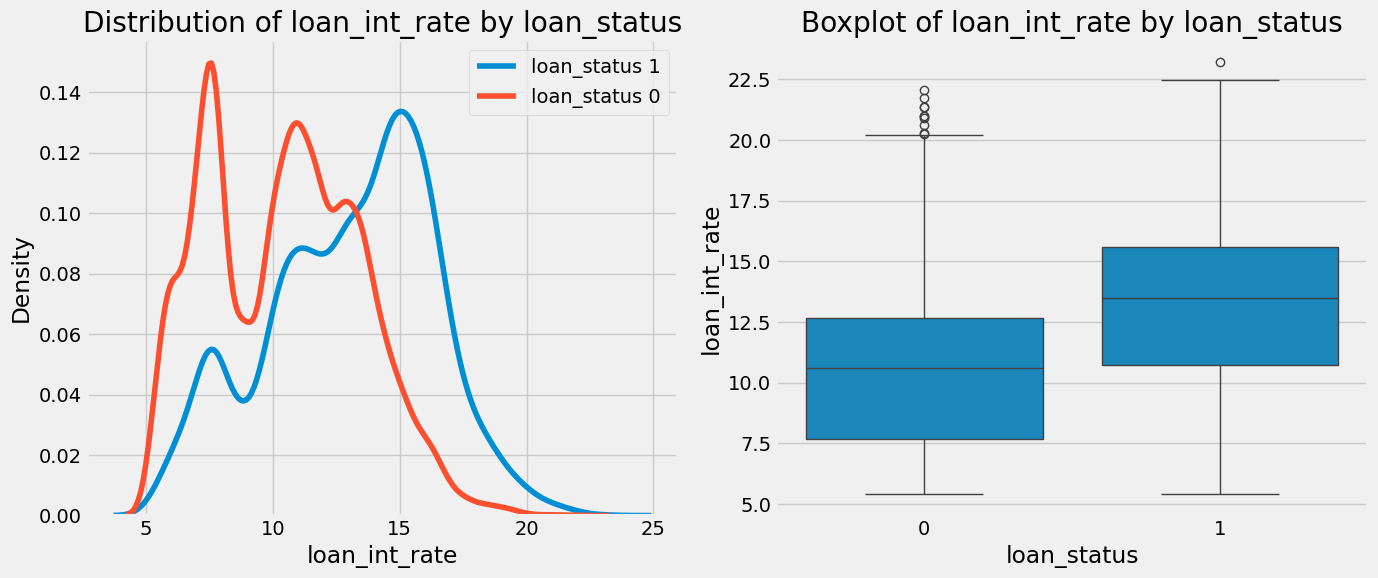

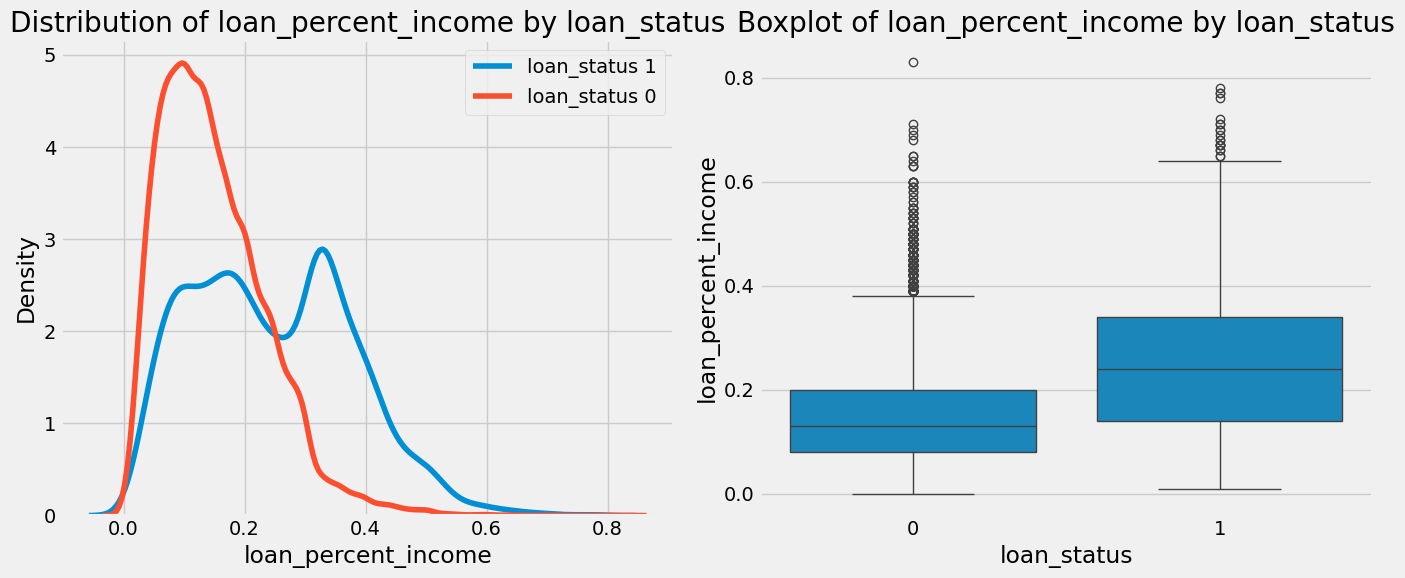

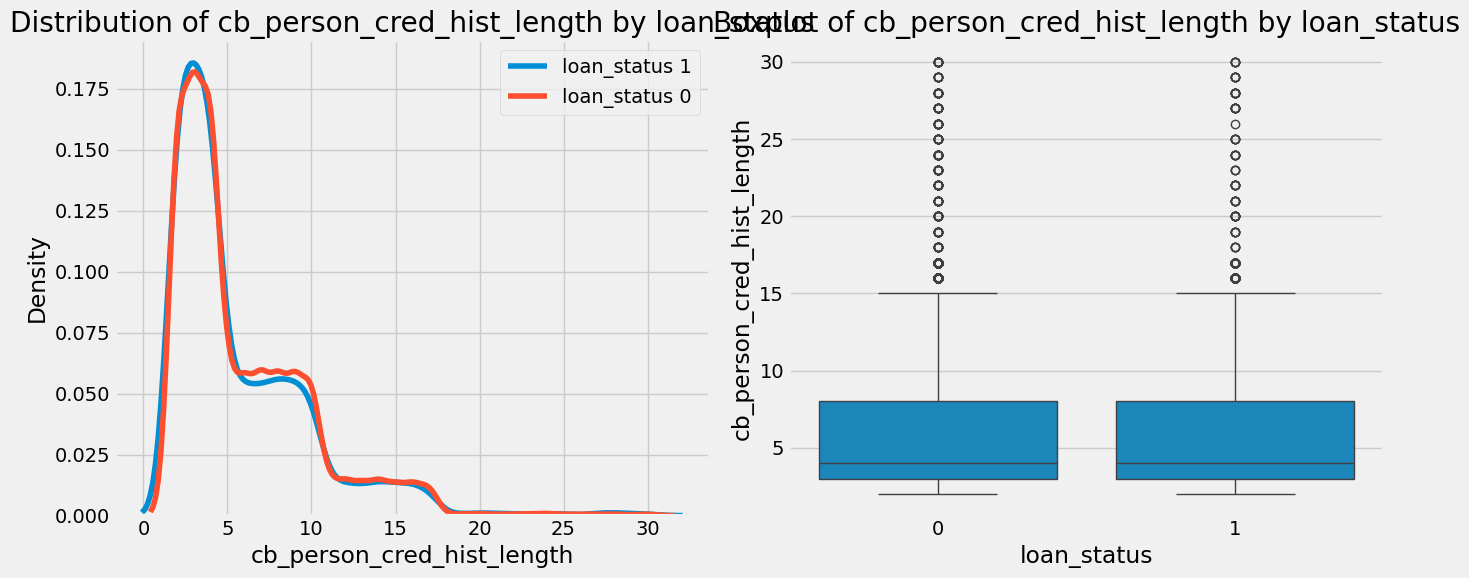

In [11]:
numerical_columns = df.select_dtypes("number").columns  # Get the numerical columns

for numerical_column in numerical_columns:
    if numerical_column != "loan_status":
        plot_dist_numerical_by_target(df, numerical_column, "loan_status")

2 features that shows higher chance loan status disapproval: `loan percent income` is high and `loan interest rate` are both high

### Categorical vs Target

In [12]:
def plot_count_categorical_by_target(df: pd.DataFrame, categorical_column: str, target_column: str) -> None:
    """
    Show count of values inside categorical column, grouped by a target column.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        categorical_column (str): The categorical column to be plotted.
        target_column (str): The target column for grouping.
    Returns
    ------------
        None
    """
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot with hue
    sns.countplot(data=df, x=categorical_column, hue=target_column, ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_column} by target_column")
    ax.set_xlabel(categorical_column)
    ax.set_ylabel("Count")

    # Rotate x labels
    plt.xticks(rotation=45)

    # Show plot
    plt.tight_layout()
    plt.show()


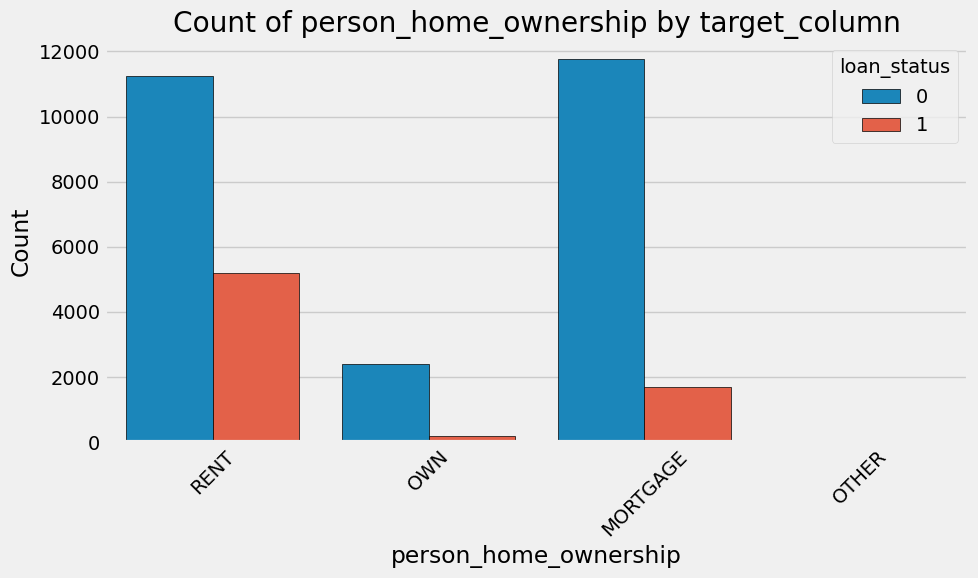

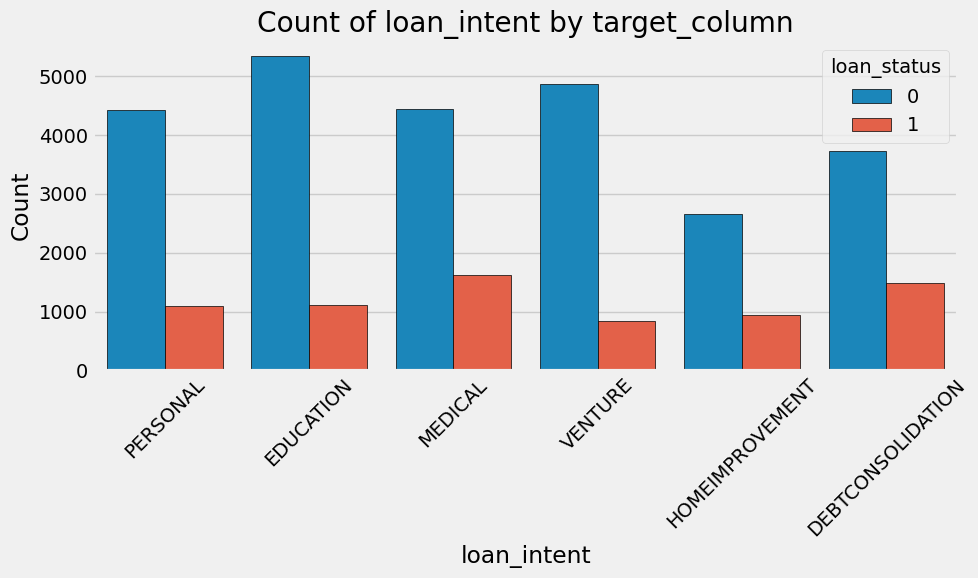

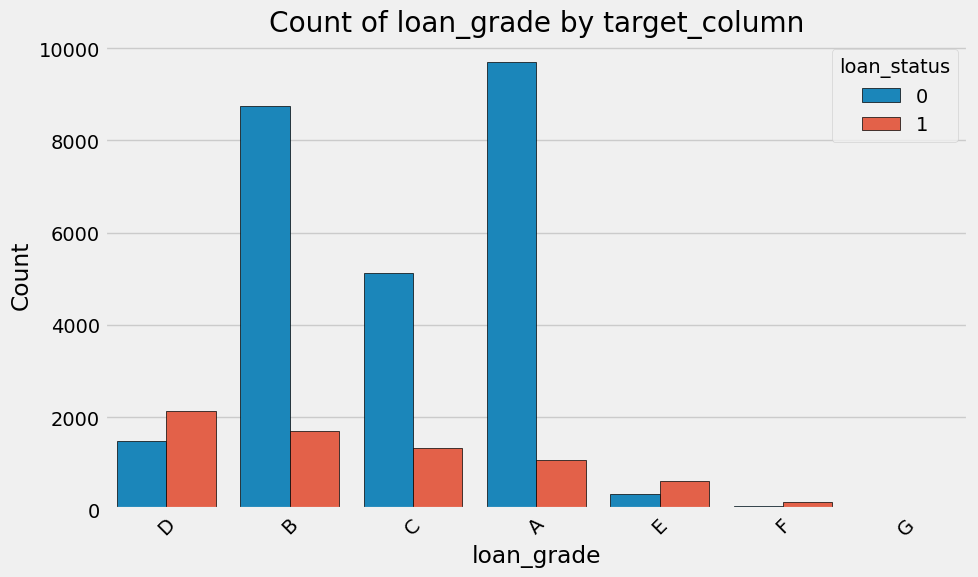

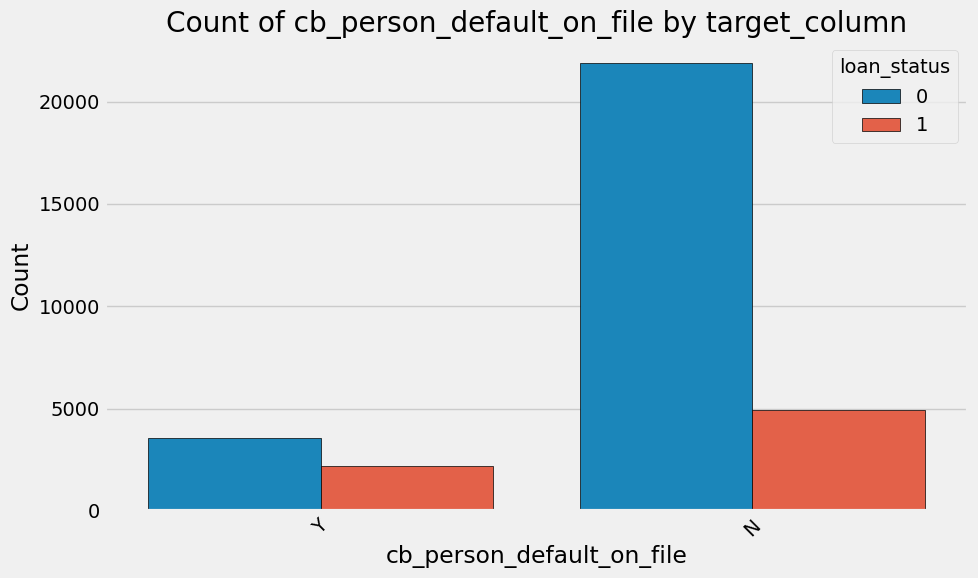

In [13]:
# Assuming df is your DataFrame and "loan_status" is the target variable
plt.style.use('fivethirtyeight')

categorical_columns = df.select_dtypes("object").columns
for categorical_column in categorical_columns:
    plot_count_categorical_by_target(df, categorical_column, "loan_status")

In [14]:
# Probability of default/ not default given values of `cb_person_default_on_file`
prob_result = df.groupby("cb_person_default_on_file")['loan_status'].value_counts(normalize=True).unstack(fill_value=0)

# Display the result
prob_result

loan_status,0,1
cb_person_default_on_file,,
N,0.816068,0.183932
Y,0.621932,0.378068


Those who has history of default in the past has 37% probability of default.

In [15]:
# Probability of default/ not default given values of `person_home_ownership`
prob_result = df.groupby('person_home_ownership')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
prob_result

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.360762,0.051871
OTHER,0.002271,0.001013
OWN,0.073386,0.005924
RENT,0.345416,0.159357


2. Those who still **rent** has 16% probability of default.


In [16]:
# Probability of default/ not default given values of `loan_grade`
prob_result = df.groupby('loan_grade')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
prob_result

loan_status,0,1
loan_grade,,
A,0.297842,0.032933
B,0.268561,0.052208
C,0.157116,0.041098
D,0.045579,0.065713
E,0.010528,0.019060
F,0.002179,0.005218
G,0.000031,0.001934


## Multicollinearity

In [17]:
def plot_heatmap(df: pd.DataFrame, figsize: Tuple[int, int]) -> None:
    """
    Show the visualization of coefficient correlation amongst features.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure

    # Calculate the coefficient correlation
    corr = df.select_dtypes(include='number').corr()

    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()

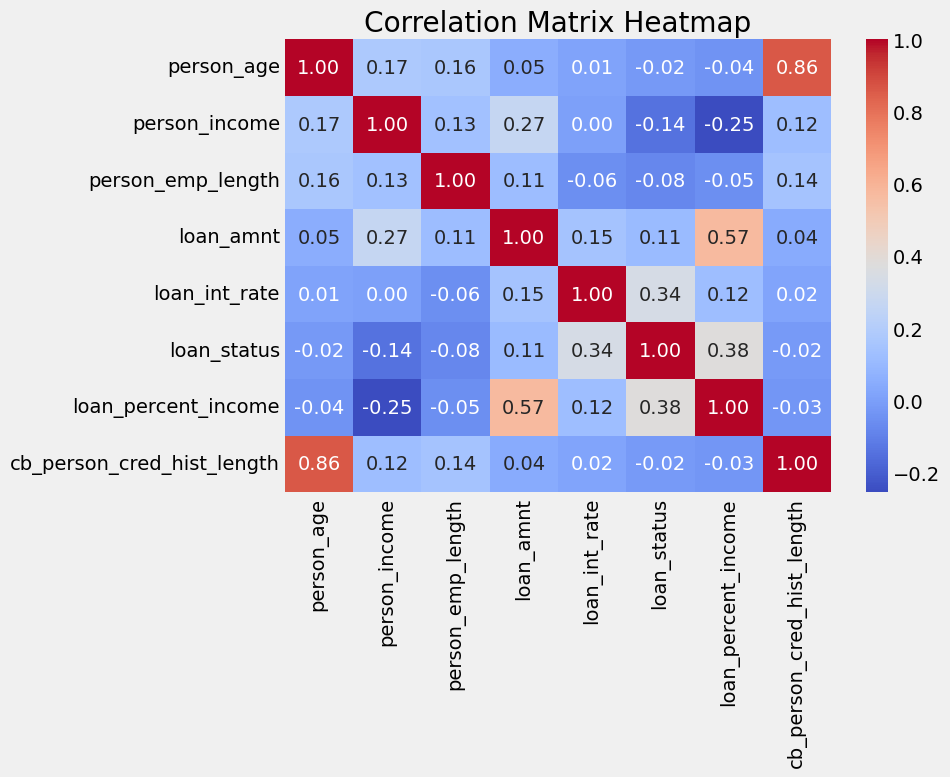

In [18]:
plot_heatmap(df, (10, 8))

In [19]:
def plot_scatter(df: pd.DataFrame, x: str, y: str, figsize: Tuple[int, int]) -> None:
    """
    Show scatter plot between two numerical columns.
    
    Parameters
    ------------
        df (pd.DataFrame): The dataframe containing the data.
        x (str): numerical column for the x-axis.
        y (str): numerical column for the y-axis.
        figsize (Tuple[int, int]): size of the plot.
    Returns
    ------------
        None
    """
    _, ax = plt.subplots(figsize=figsize)  # Create a figure
    
    # Create scatterplot with customized aesthetics
    sns.scatterplot(x=x, y=y, data=df, color='skyblue', ax=ax)

    # Add trend line
    sns.regplot(x=x, y=y, data=df, scatter=False, color='orange', ci=None, ax=ax)

    # Add labels and title
    ax.set_title(f"{x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # Show plot
    plt.show()

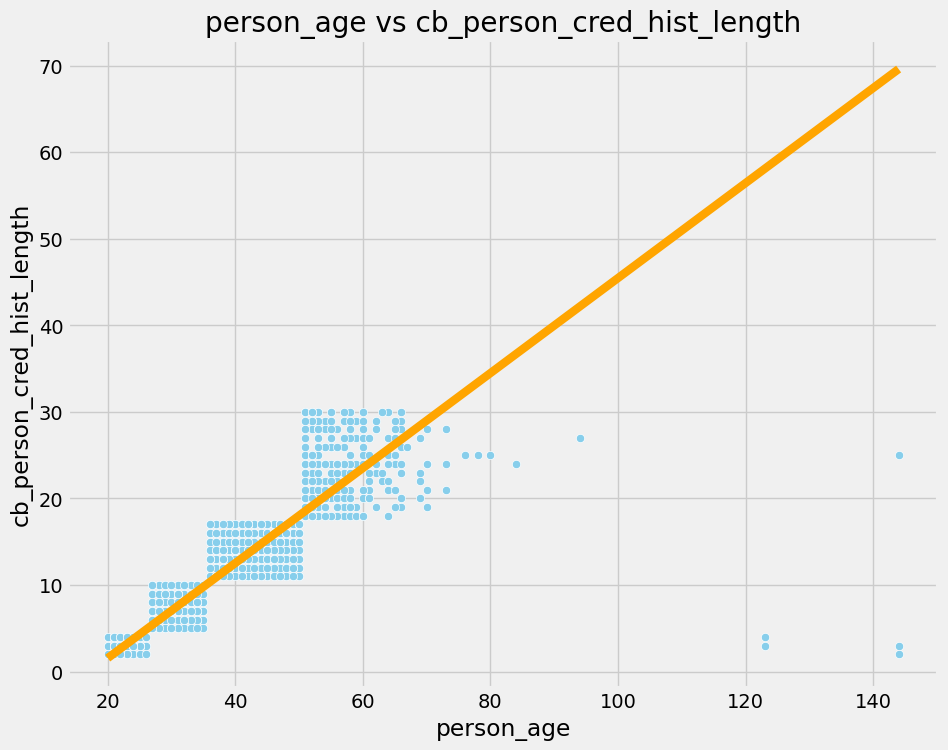

In [20]:
plot_scatter(df, "person_age", "cb_person_cred_hist_length", (10, 8))

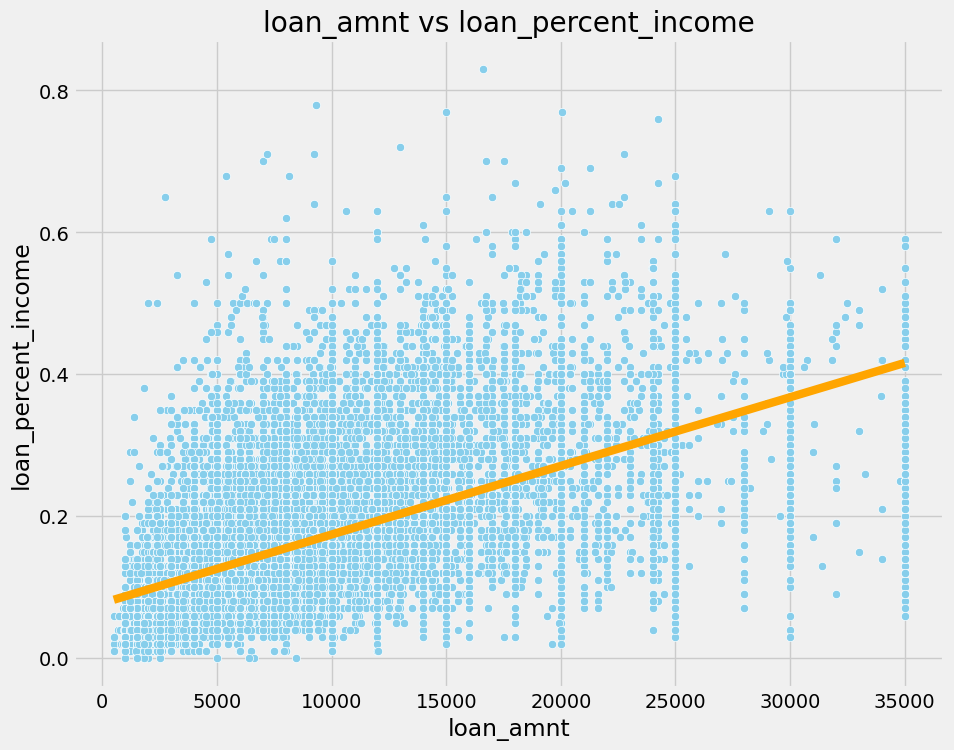

In [21]:
plot_scatter(df, "loan_amnt", "loan_percent_income", (10, 8))

# Data Preparation
For this data preparation involves:
1. Calculating the **Weight of Evidence (WOE)** and **Information Value (IV)**
2. Filter features based on the **IV**
3. Map feature values into WOE values. 

Class:
1. WOETransformer
    - Calculate WOE
    - Create mapping
2. IVTransformer
    - Transformer WOE to IV
    - Interpret the IV value
    - Filter IV
3. DataPreprocessor 
    - Split Data
    - Create binning
4. Visualizer:
    - plot data (show/ save)
5. Model
    - Train
    - Predict
    - Evaluate
6. ScoreTransformer:
    - Calculate score using WOE
    - Transform to WOE

## Data Splitting

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy import stats
from typing import Tuple
from typing import Union
from sklearn.model_selection import train_test_split
class DataPreprocessor:
    def __init__(self):
        pass

    @staticmethod
    def split_data(df: pd.DataFrame, label: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Split data into train and test data evenly based on their label values.

        Args:
            df (pd.DataFrame): Pandas DataFrame containing the data.
            label (str): Label column.
        Returns:
            Tuple[pd.DataFrame, pd.DataFrame]: Train and test Pandas DataFrame.
        """
        X, y = df.drop(columns=[label]), df[label]
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
        train = pd.concat([X_train, y_train], axis=1)
        test = pd.concat([X_test, y_test], axis=1)

        return train, test
    
    @staticmethod
    def generate_bins(df: pd.DataFrame, numerical_columns: str, label_column:str, num_of_bins: int) -> pd.DataFrame:
        """
        Create bins for a numerical column, dividing it into a specified number of equal-sized bins.

        Args:
            df (pd.DataFrame): Pandas DataFrame containing the data.
            numerical_column (str): Numerical column.
            num_of_bins (int): Number of bins to create.
        Returns:
            pd.DataFrame: Pandas DataFrame with `numerical_column` values are changed to bin.
        """
        for numerical_column in numerical_columns:
            if numerical_column != label_column:
                df[numerical_column] = pd.qcut(
                    df[numerical_column], 
                    q = num_of_bins, 
                    duplicates="drop"
                )
        return df
        
    @staticmethod
    def fill_missing_categorical(df: pd.DataFrame) -> pd.DataFrame:
        """
        Fill missing categorical columns inside Pandas DataFrame with `Missing`.

        Args:
            df (pd.DataFrame): Pandas DataFrame containing the data.
        Returns:
            pd.DataFrame: Pandas DataFrame with `numerical_column` values are changed to bin.
        """
        for column in df.columns:
            if df[column].isna().sum() > 0 and df[column].dtype in ["object", "category"]:
                # Add category 'Missing' to replace the missing values
                df[column] = df[column].cat.add_categories('Missing')
                # Replace missing values with category 'Missing'
                df[column] = df[column].fillna(value = 'Missing')
        return df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# split data betweem train and text
train, test = DataPreprocessor.split_data(df, "loan_status")

## Weight of Evidence (WOE) and Information Value (IV)
For this data preparation involves:
1. Calculating the **WOE** and **IV**
2. Filter features based on the **IV**
3. Map feature values into **WOE** values. 

### 1. Perform Binning on Numerical Variables

In [5]:
train_binned = DataPreprocessor.generate_bins(
    train.copy(), 
    train.select_dtypes("number").columns,
    "loan_status",
    4
)
train_binned = DataPreprocessor.fill_missing_categorical(train_binned)
display(train_binned.isna().sum())
display(train_binned)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
15884,"(23.0, 26.0]","(79000.0, 6000000.0]",MORTGAGE,"(2.0, 4.0]",EDUCATION,A,"(12000.0, 35000.0]","(5.419, 7.9]","(-0.001, 0.09]",N,"(3.0, 4.0]",0
15138,"(19.999, 23.0]","(3999.999, 38443.25]",RENT,"(4.0, 7.0]",PERSONAL,B,"(499.999, 5000.0]","(10.99, 13.47]","(-0.001, 0.09]",N,"(3.0, 4.0]",1
7474,"(23.0, 26.0]","(38443.25, 55000.0]",MORTGAGE,"(7.0, 123.0]",MEDICAL,B,"(12000.0, 35000.0]","(10.99, 13.47]","(0.23, 0.83]",N,"(1.999, 3.0]",0
18212,"(26.0, 30.0]","(3999.999, 38443.25]",OWN,Missing,MEDICAL,C,"(499.999, 5000.0]","(13.47, 22.48]","(0.23, 0.83]",N,"(4.0, 8.0]",1
6493,"(23.0, 26.0]","(38443.25, 55000.0]",MORTGAGE,"(-0.001, 2.0]",VENTURE,A,"(8000.0, 12000.0]","(5.419, 7.9]","(0.15, 0.23]",N,"(1.999, 3.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...
14621,"(23.0, 26.0]","(79000.0, 6000000.0]",MORTGAGE,"(7.0, 123.0]",HOMEIMPROVEMENT,E,"(12000.0, 35000.0]","(13.47, 22.48]","(0.23, 0.83]",N,"(3.0, 4.0]",1
18736,"(26.0, 30.0]","(55000.0, 79000.0]",RENT,"(-0.001, 2.0]",MEDICAL,C,"(12000.0, 35000.0]","(10.99, 13.47]","(0.23, 0.83]",N,"(4.0, 8.0]",0
1663,"(19.999, 23.0]","(3999.999, 38443.25]",RENT,"(4.0, 7.0]",EDUCATION,A,"(499.999, 5000.0]","(5.419, 7.9]","(-0.001, 0.09]",N,"(1.999, 3.0]",0
18257,"(26.0, 30.0]","(79000.0, 6000000.0]",RENT,"(2.0, 4.0]",HOMEIMPROVEMENT,E,"(12000.0, 35000.0]","(13.47, 22.48]","(0.15, 0.23]",Y,"(4.0, 8.0]",0


In [6]:
def plot_label_by_binned_column(df: pd.DataFrame, binned_column: str, label_column: str) -> None:
    """
    Plot a label variable by a specified binned column using a bar plot.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        binned_column (str): The binned column to plot against the label variable.
        label_column (str): The label variable to be plotted.

    Returns:
        None
    """
    # Set figure size and style
    plt.figure(figsize=(7, 5))

    # Create bar plot with customized aesthetics
    sns.barplot(x=binned_column, y=label_column, data=df, errorbar=None)

    # Add title and labels
    plt.title(f"{label_column} by {binned_column}", fontsize=16)
    plt.xlabel(binned_column, fontsize=14)
    plt.ylabel("Loan Status", fontsize=14)
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

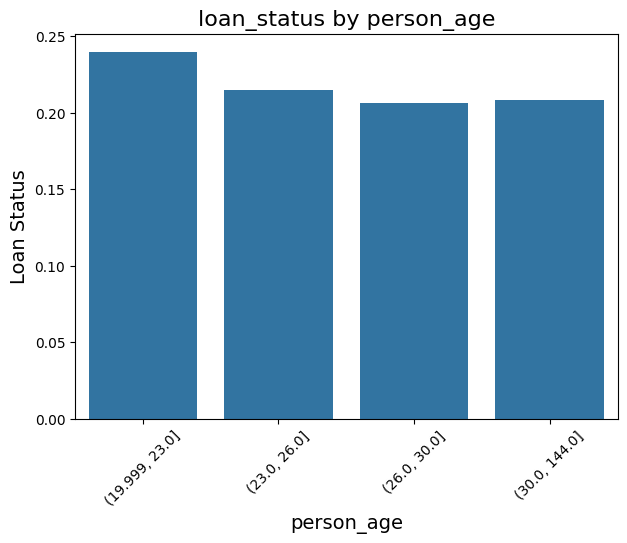

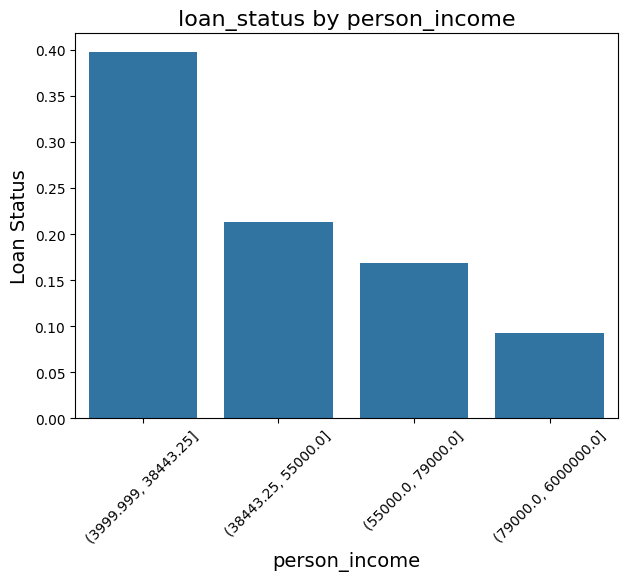

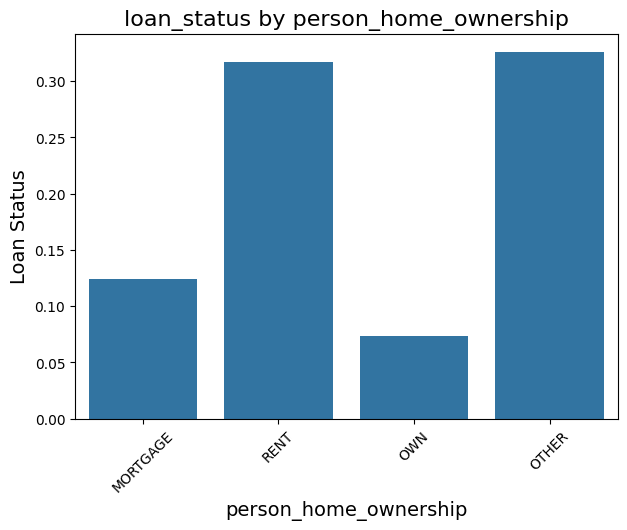

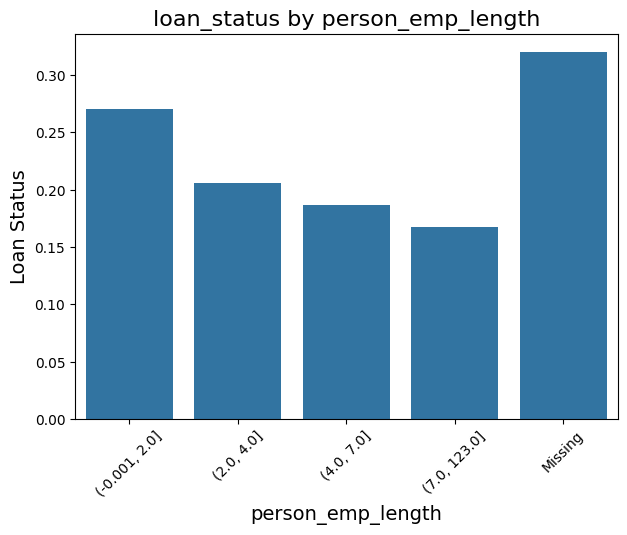

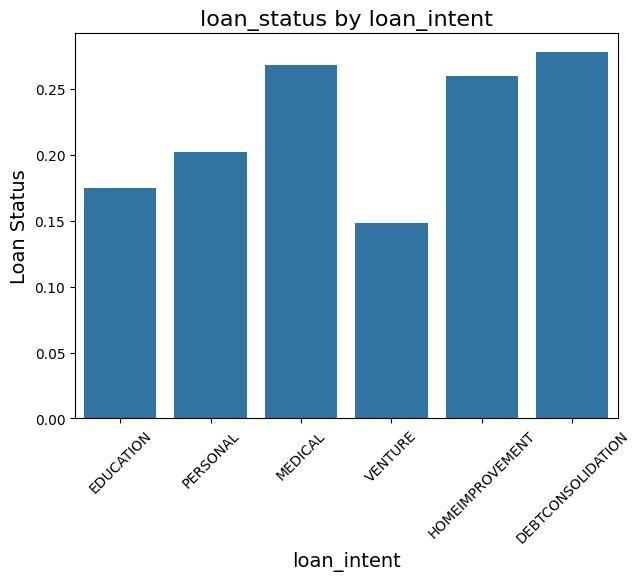

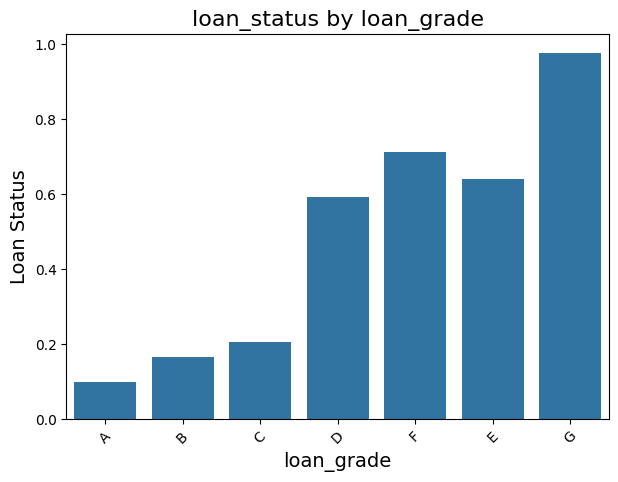

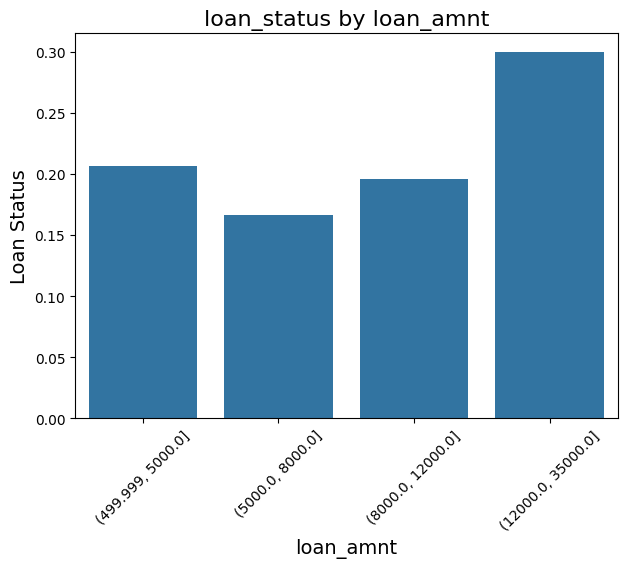

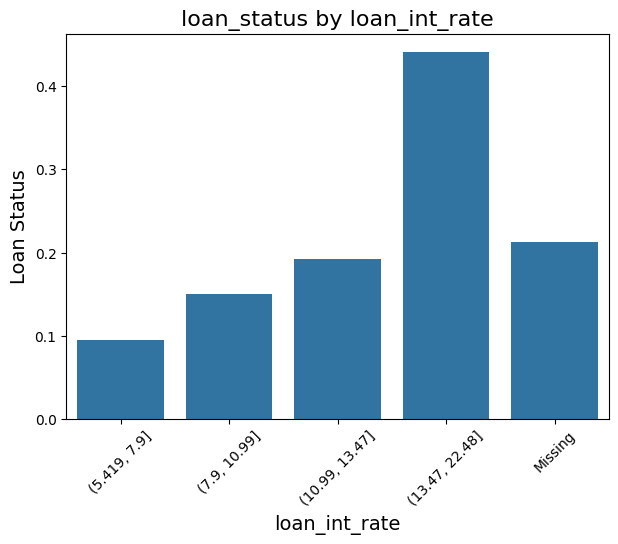

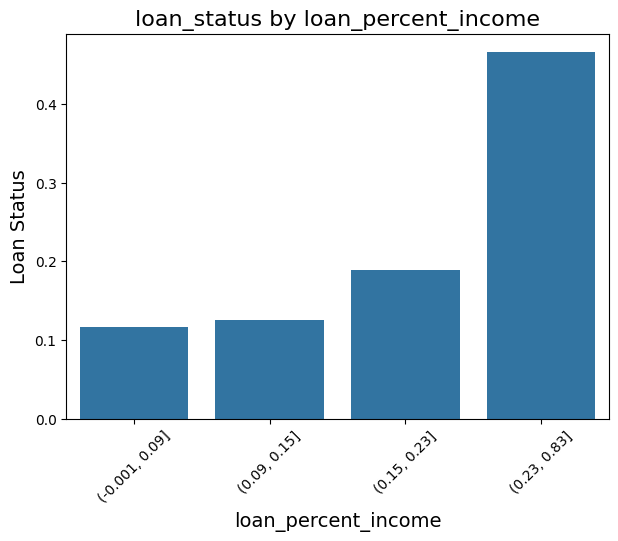

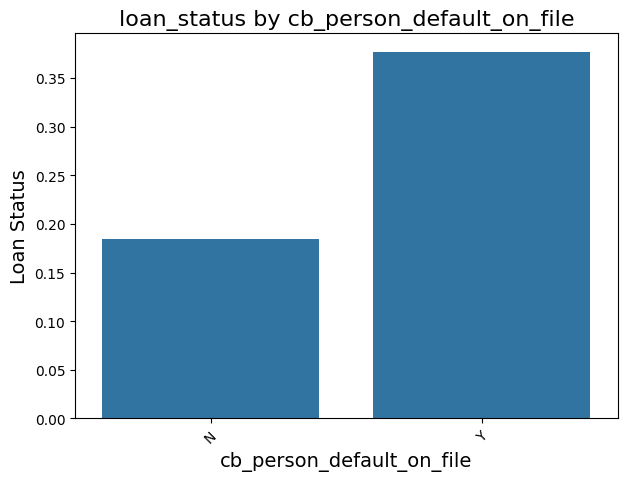

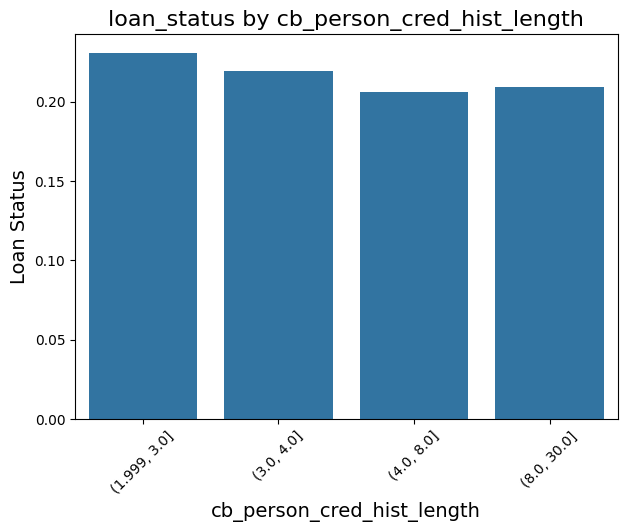

In [7]:
for binned_column in train_binned.columns:
    if binned_column != "loan_status":
        plot_label_by_binned_column(train_binned, binned_column, "loan_status")

1. Those who are still producing low income has a high probability of default.
2. Those who are still new in the job has a high probability of default.
3. High interest rate (`loan_int_rate`) has a high probability of default.
4. Hihg proportion of loan with respect to income (`loan_percent_income`) has a high probability of default. 

### 2. Calculate WoE and IV

In [37]:
class WOETransformer:
    def __init__(self):
        self._woe_dict = {}
        self._woe_df = pd.DataFrame()
        self._iv_df = pd.DataFrame()
    
    def get_iv_df(self) -> pd.DataFrame:
        return self._iv_df.copy()
    
    def get_woe_df(self) -> pd.DataFrame:
        return self._woe_df.copy()
    
    def get_woe_dict(self) -> dict:
        return self._woe_dict.copy()

    def _get_woe(self, value: Union[int, float, str], woe_dict: dict) -> float:
        """Tranform column values into WOE values.

        Args:
            value (Union[int, float, str]): column value to be mapped to WOE value.
            woe_dict_map (dict): dictionary containing the conditions (keys) and WOEs (values).

        Returns:
            float: WOE value.
        """
        woe_value = None
        if pd.isna(value):
            woe_value = woe_dict.get("Missing", None)
        else:
            for interval, woe in woe_dict.items():
                if isinstance(interval, pd.Interval) and value in interval:
                    woe_value = woe
        return woe_value

    def fit(self, df: pd.DataFrame, label_column: str) -> None:
        crosstabs = {}
        for col in df.columns:
            if col != label_column:
                crosstabs[col] = pd.crosstab(df[col], df[label_column], margins=True)
        
        for col, crosstab in crosstabs.items(): 
            # Calculate WOE
            crosstab["proportion_not_default"] = crosstab[0] / crosstab[0]["All"]
            crosstab["proportion_default"] = crosstab[1] / crosstab[1]["All"]
            crosstab["WOE"] = np.log(crosstab["proportion_not_default"]/ crosstab["proportion_default"])
            temp_df = crosstab.reset_index().iloc[:-1, [0, -1]].copy()
            temp_df.columns = ["Value", "WOE"]
            self._woe_dict[col] = temp_df.set_index("Value")["WOE"].to_dict()  # for woe values mapping
            
            temp_df.loc[:, "Characteristic"] = col
            self._woe_df = pd.concat((self._woe_df, temp_df), axis=0)  # for pandas dataframe
        
            # Calculate IV
            IV = np.sum((crosstab["proportion_not_default"]-crosstab["proportion_default"])*crosstab["WOE"])
            self._iv_df = pd.concat((self._iv_df, pd.DataFrame({"Characteristic": [col], "iv": [IV]})), axis=0)
        

    def transform(self, woe_df: pd.DataFrame, label_column: str) -> None:
        for col in woe_df.select_dtypes("number").columns:
            if col != label_column:
                woe_df[col] = woe_df[col].apply(lambda x: self._get_woe(x, self._woe_dict[col]))
                woe_df[col] = woe_df[col].fillna(self._woe_dict[col].get("Missing", np.nan))

        for col in woe_df.select_dtypes("object").columns:
            if col != label_column:
                woe_df[col] = woe_df[col].map(self._woe_dict[col])
                woe_df[col] = woe_df[col].fillna(self._woe_dict[col].get("Missing", np.nan))
        return woe_df
    

In [88]:
# crosstabs = {}
# for col in train_binned.columns:
#     if col != "loan_status":
#         crosstabs[col] = pd.crosstab(train_binned[col], train_binned["loan_status"], margins=True)

In [87]:
# # 1. Calculate the total amount of values inside each bin. Calculate the default and non default cases
# crosstabs = {}
# for col in train_binned.columns:
#     if col != "loan_status":
#         crosstabs[col] = pd.crosstab(train_binned[col], train_binned["loan_status"], margins=True)
        
# # 2. Calculate the Weight of Evidence and Information Value
# WOE_df = pd.DataFrame()
# IV_df = pd.DataFrame()

# for col, crosstab in crosstabs.items(): 
#     crosstab["proportion_not_default"] = crosstab[0] / crosstab[0]["All"]
#     crosstab["proportion_default"] = crosstab[1] / crosstab[1]["All"]
#     crosstab["WOE"] = np.log(crosstab["proportion_not_default"]/ crosstab["proportion_default"])
#     IV = np.sum((crosstab["proportion_not_default"]-crosstab["proportion_default"])*crosstab["WOE"])

#     crosstab = crosstab.reset_index()
#     temp_df = crosstab.iloc[:-1, [0, -1]].copy()
#     temp_df.columns = ["Value", "WOE"]
    
# #     temp_WOE_df.loc[:, "Characteristic"] = col
# #     WOE_df = pd.concat((WOE_df, temp_WOE_df), axis=0)
# #     IV_df = pd.concat((IV_df, pd.DataFrame({"Characteristic": [col], "iv": [IV]})))

# # WOE_df = WOE_df[["Characteristic", "Characteristic Value", "WOE"]]
# # WOE_df = WOE_df.reset_index(drop=True)
# # IV_df = IV_df.reset_index(drop=True)

# # gc.enable()
# # crosstab = None
# # crosstabs = None
# # gc.collect()

In [38]:
woe_transformer = WOETransformer()
woe_transformer.fit(train_binned, "loan_status")

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index

In [39]:
# 3. Filter those with low value of IV
def interpret_iv(value):
    if value < 0.02:
        return "Not Predictive"
    elif 0.02 <= value and value < 0.1:
        return "Weak Predictive"
    elif 0.1 <= value and value < 0.3:
        return "Medium Predictive"
    elif 0.3 <= value and value < 0.5:
        return "Strong Predictive"
    else:
        return "Very Strong Predictive"

IV_df = woe_transformer.get_iv_df()
IV_df["Interpretation"] = IV_df["iv"].apply(lambda x: interpret_iv(x))
IV_df = IV_df.sort_values(by="iv", ascending=False)
IV_df

,Characteristic,iv,Interpretation
0,loan_grade,0.869018,Very Strong Predictive
0,loan_percent_income,0.609508,Very Strong Predictive
0,loan_int_rate,0.518770,Very Strong Predictive
0,person_income,0.436270,Strong Predictive
0,person_home_ownership,0.389711,Strong Predictive
0,cb_person_default_on_file,0.162480,Medium Predictive
0,loan_intent,0.088686,Weak Predictive
0,loan_amnt,0.079956,Weak Predictive
0,person_emp_length,0.067094,Weak Predictive
0,person_age,0.006049,Not Predictive


In [40]:
def plot_weight_of_evidence(df: pd.DataFrame, characteristic: str) -> None:
    """
    Plot the Weight of Evidence (WOE) for a specified characteristic.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data with 'Characteristic', 'Characteristic Value', and 'WOE' columns.
        characteristic (str): The characteristic for which to plot the WOE.
    Returns:
        None
    """
    plt.style.use('fivethirtyeight')
    filtered_df = df[df['Characteristic'] == characteristic]

    # Define the plot size and title
    _, ax = plt.subplots(figsize=(12, 8))

    # Plot the WOE using barplot and point plot
    sns.barplot(x='Value', y='WOE', data=filtered_df, ax=ax)
    sns.pointplot(x='Value', y='WOE', data=filtered_df, linestyles='--', color="red", markers="o", ax=ax)
    
    # Add title, x-label and y-label
    ax.set_title(f'WOE for {characteristic}', fontsize=16, fontweight='bold')
    ax.set_xlabel(characteristic, fontsize=14)
    ax.set_ylabel('Weight of Evidence (WOE)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

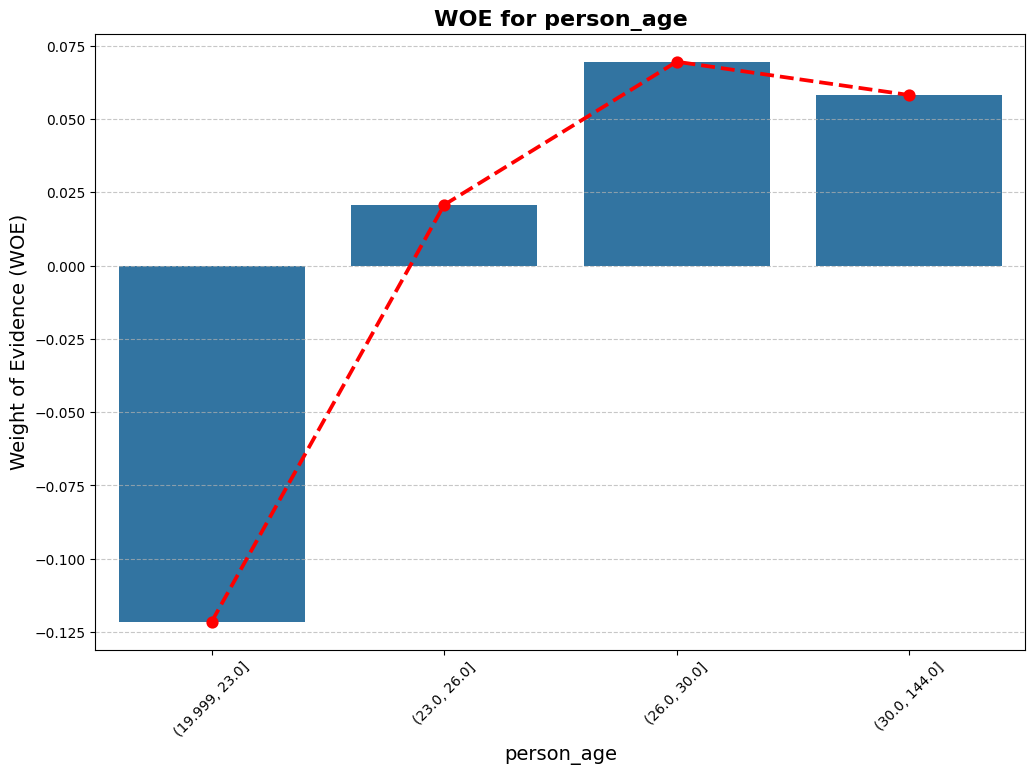

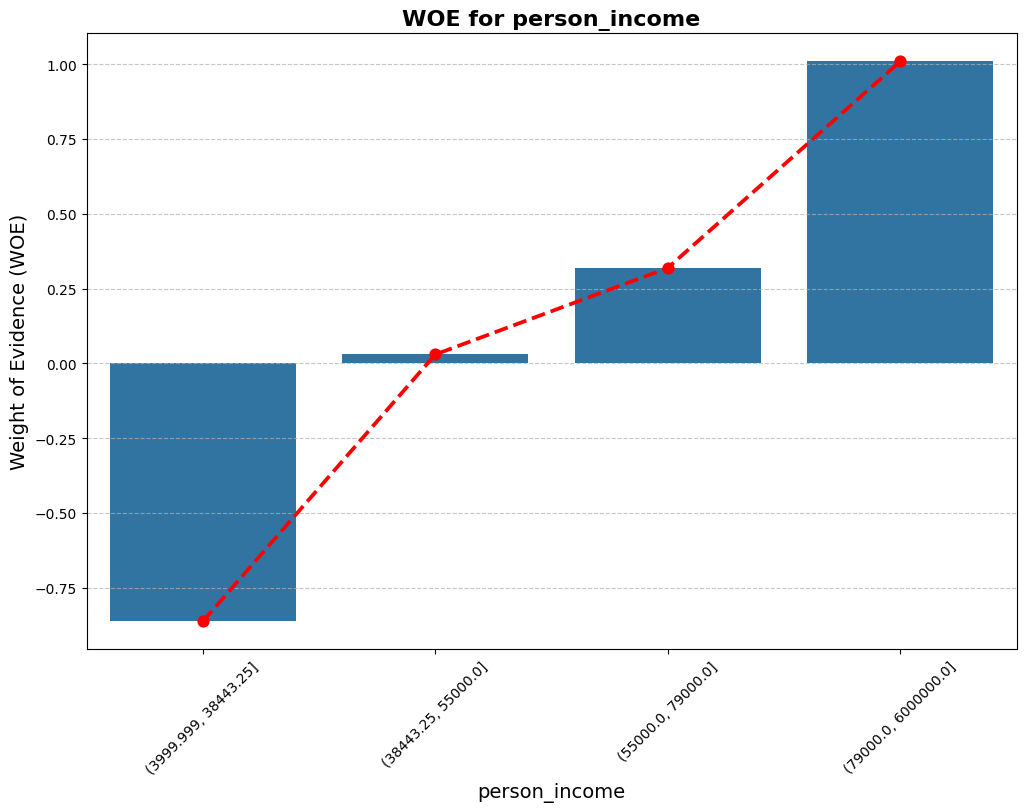

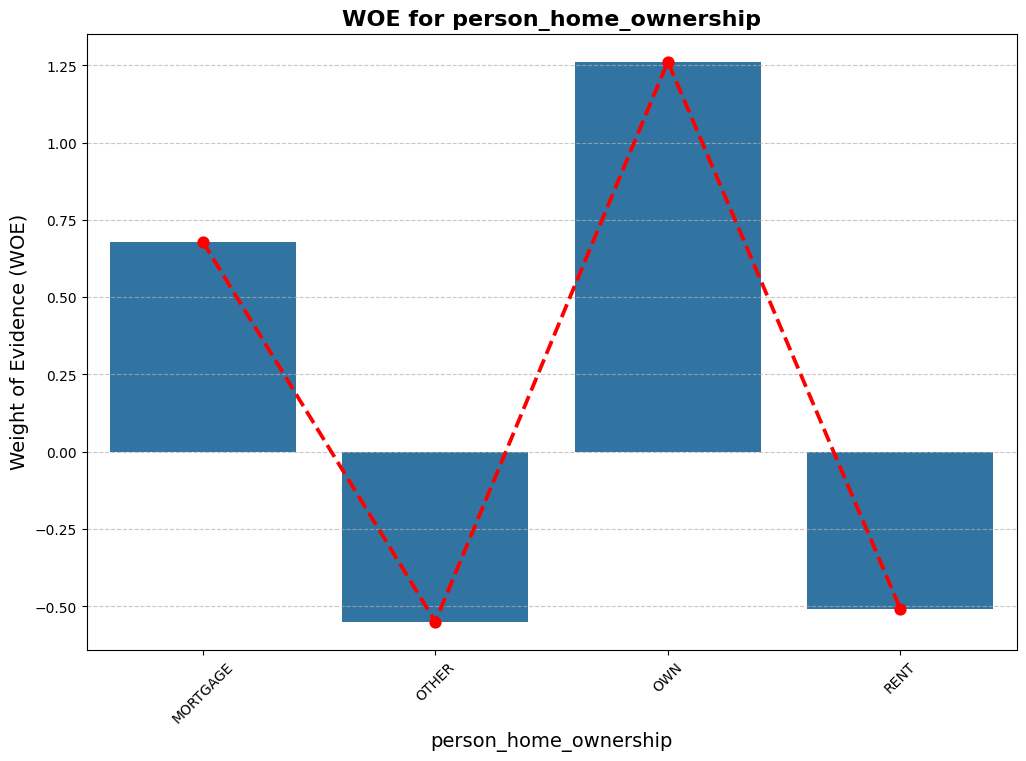

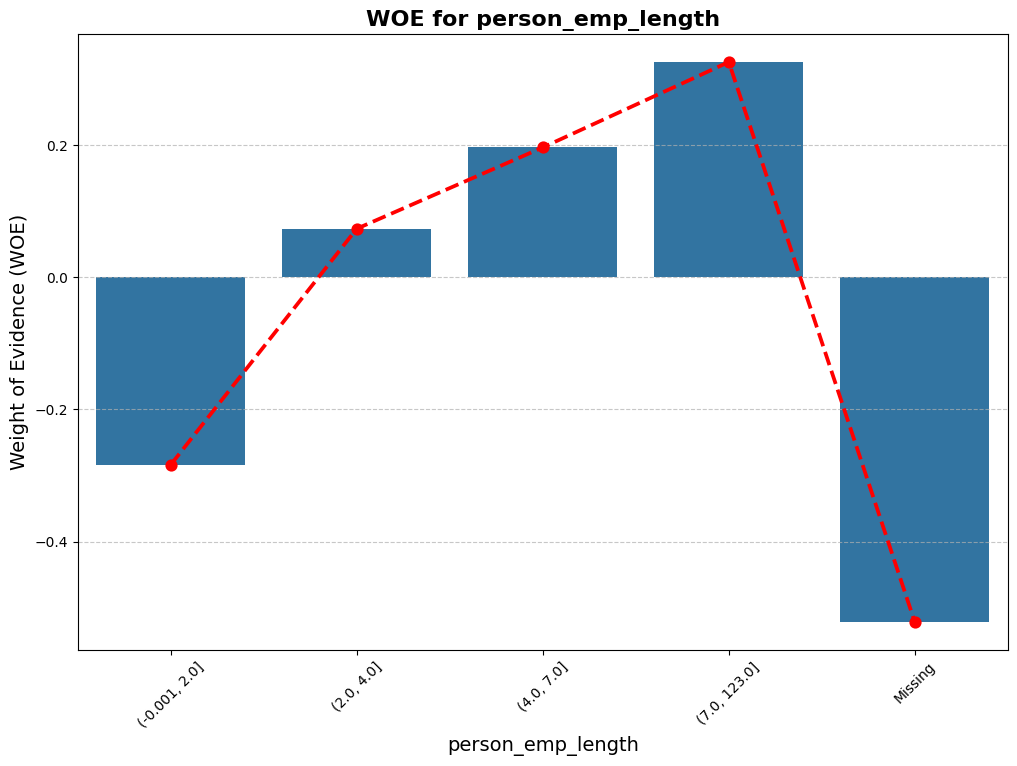

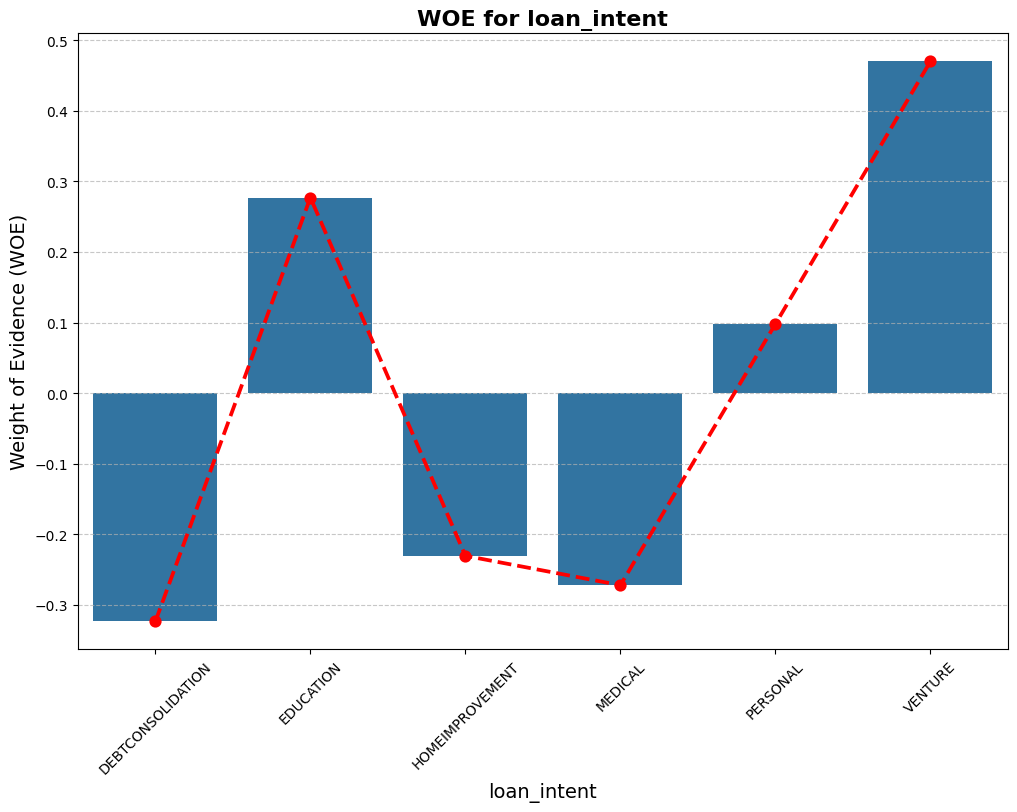

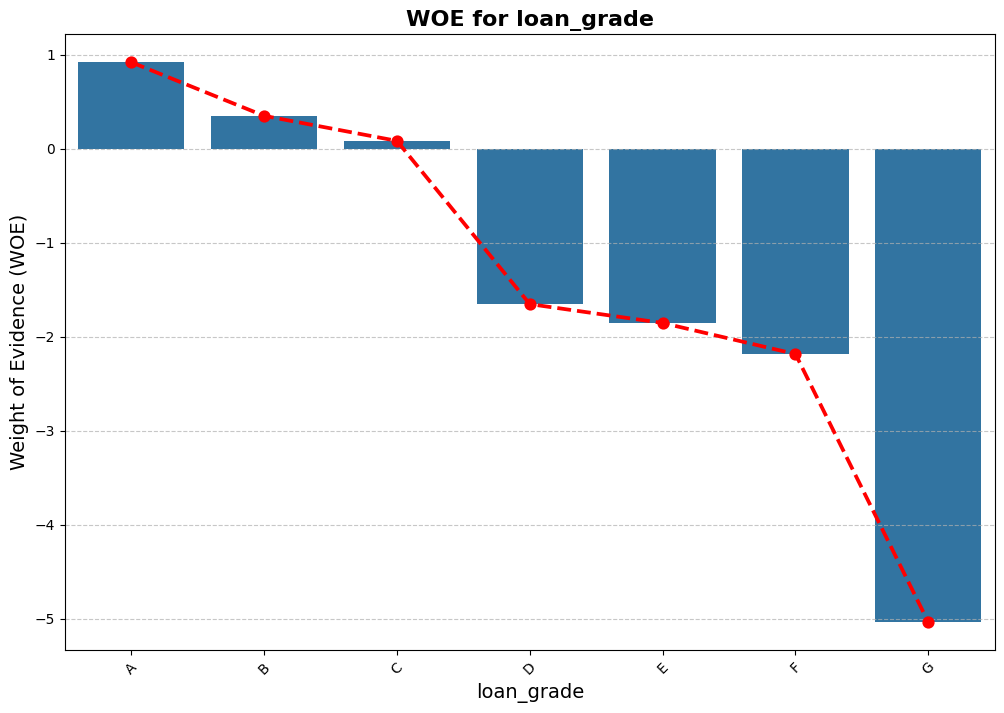

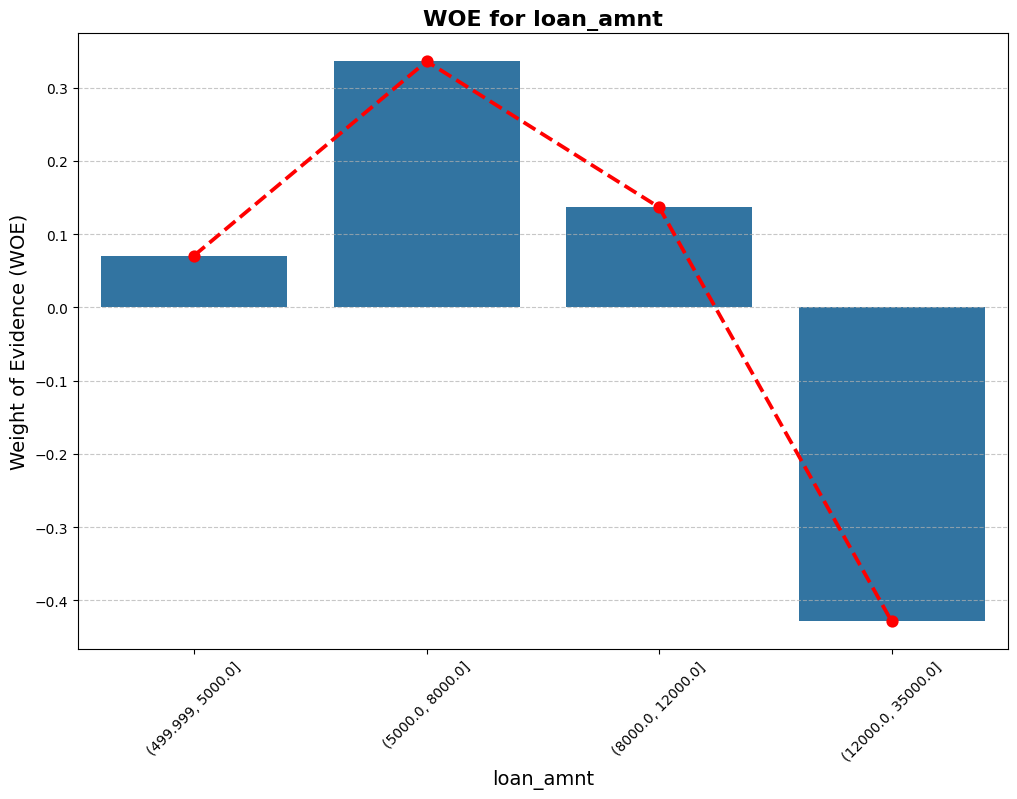

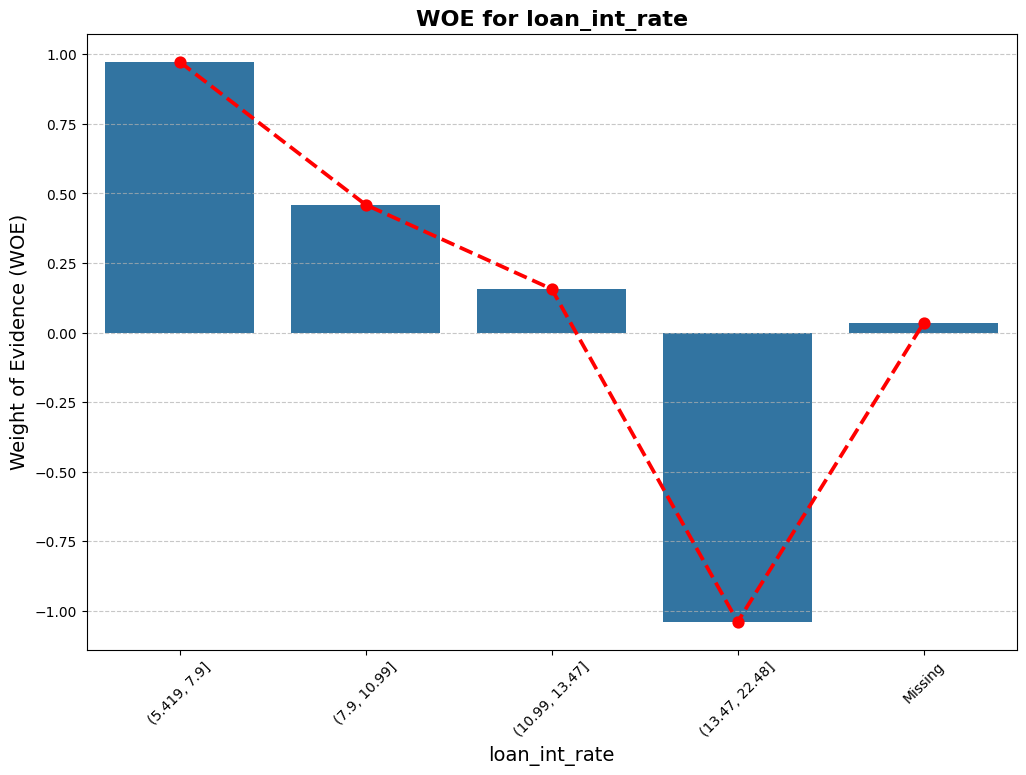

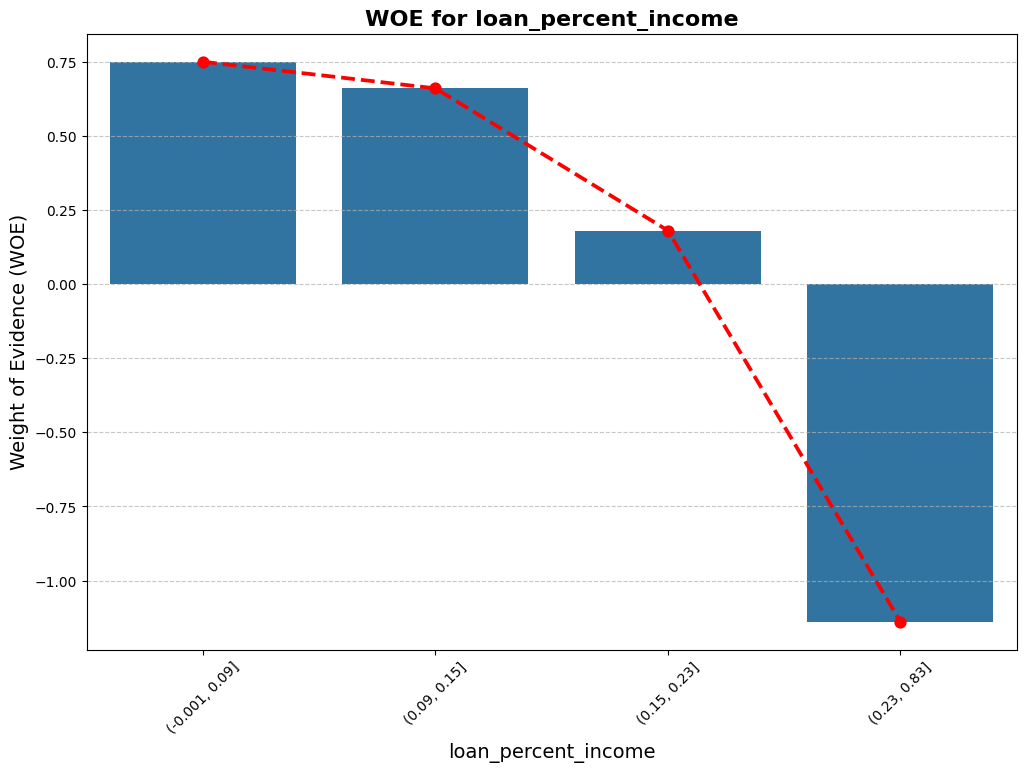

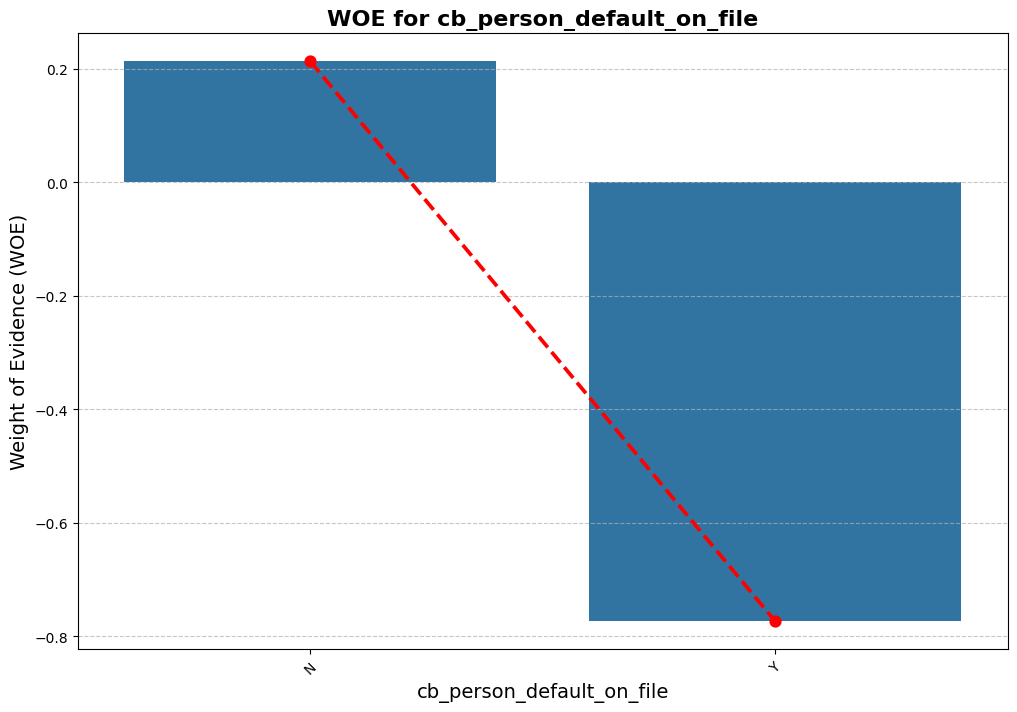

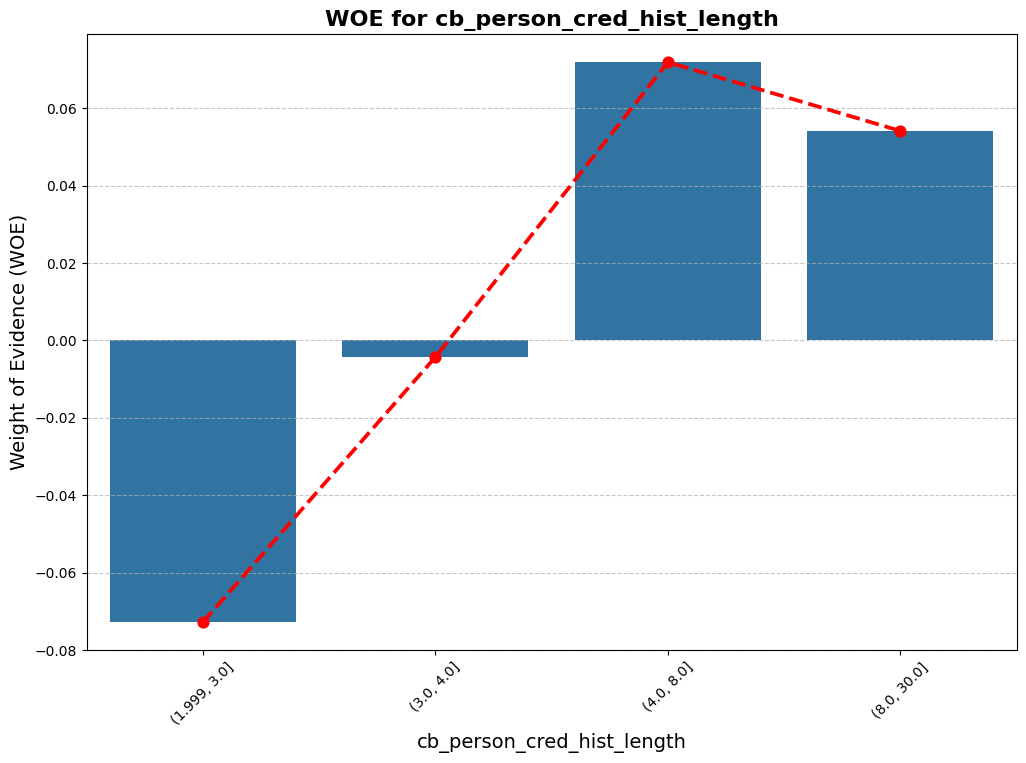

In [41]:
WOE_df = woe_transformer.get_woe_df()
characteristic_names = WOE_df["Characteristic"].unique()
for characteristic in characteristic_names:
    plot_weight_of_evidence(WOE_df, characteristic)

### 3. Map Column Values with Weight of Evidence (WOE) Values

In [43]:
# Map column values into Weight of Evidence values for Training Data
train_woe = train.copy()
test_woe = test.copy()

train_woe = woe_transformer.transform(train_woe, "loan_status")
test_woe = woe_transformer.transform(test_woe, "loan_status")

# Feature Selection

1. Prepare all features
2. Loop all features start from 1 and adding it up and calculate the cross validation score
3. Document it

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator


class FeatureSelector:
    def __init__(self):
        pass
    
    def forward_feature_selection(
        self,
        X_train: pd.DataFrame, 
        y_train: Union[np.array, list], 
        scoring='roc_auc', 
        cv=5
    ) -> Tuple[np.array, pd.DataFrame]:
    
        predictors_list = []
        score_list = []
        predictors = []

        for column in X_train.columns:
            predictors = predictors + [column]

            X = X_train.loc[:, predictors]
            y = y_train

            # Create model
            model = LogisticRegression(penalty=None, class_weight="balanced", random_state=42)
            
            # Perform cross-validation and get the average score
            scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
            
            # Document the predictors and average score
            predictors_list.append(predictors)
            score_list.append(np.mean(scores))

        best_model = ffs_df.iloc[ffs_df["Score"].argmax()]
        selected_features = best_model["Predictors"]

        return selected_features, pd.DataFrame({
            "Predictors": predictors_list,
            "Score": score_list
        })

In [60]:
feature_selector = FeatureSelector()
X_train, y_train = train_woe.drop(columns=["loan_status"]), train_woe["loan_status"]
selected_features, ffs_df = feature_selector.forward_feature_selection(
    X_train=X_train, 
    y_train=y_train, 
    scoring='recall', 
    cv=5
)
display(selected_features)
display(ffs_df)

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

,Predictors,Score
0,[person_age],0.296518
1,"[person_age, person_income]",0.456030
2,"[person_age, person_income, person_home_owners...",0.739534
3,"[person_age, person_income, person_home_owners...",0.739534
4,"[person_age, person_income, person_home_owners...",0.670239
5,"[person_age, person_income, person_home_owners...",0.741121
6,"[person_age, person_income, person_home_owners...",0.778932
7,"[person_age, person_income, person_home_owners...",0.778756
8,"[person_age, person_income, person_home_owners...",0.802324
9,"[person_age, person_income, person_home_owners...",0.802148


# Modelling

In [83]:
from sklearn.linear_model import LogisticRegression

class LogisticRegressionModel:
    def __init__(self, *args, **kwargs):
        """
        Initialize Logistic Regression with specified parameters.

        Args:
            penalty (str, optional): Specifies the norm used in the penalization. Defaults to 'l2'.
            C (float, optional): Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization. Defaults to 1.0.
            solver (str, optional): Algorithm to use in the optimization problem. Defaults to 'lbfgs'.
            max_iter (int, optional): Maximum number of iterations taken for the solvers to converge. Defaults to 100.
        """
        self.model = LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        """
        Fit the Logistic Regression model to the given training data.

        Args:
            X (array-like or sparse matrix of shape (n_samples, n_features)): Training data.
            y (array-like, shape (n_samples,)): Target values.

        Returns:
            self: Returns an instance of self.
        """
        self.model.fit(X, y)

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Args:
            X (array-like or sparse matrix of shape (n_samples, n_features)): Samples.

        Returns:
            array, shape (n_samples,): Predicted class label per sample.
        """
        return self.model.predict(X)

    def predict_proba(self, X):
        """
        Probability estimates.

        The returned estimates for all classes are ordered by the label of classes.

        Args:
            X (array-like or sparse matrix of shape (n_samples, n_features)): Samples.

        Returns:
            array, shape (n_samples, n_classes): Probability of the sample for each class in the model.
        """
        return self.model.predict_proba(X)
    
    def get_coefficient(self):
        return self.model.coef_.reshape(-1)

    def get_intercept(self):
        return self.model.intercept_
    
    def evaluate(self):
        

In [98]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
import numpy as np

class EvaluationMetrics:
    def __init__(self, y_true, y_pred_prob):
        """
        Initialize with true labels and predicted probabilities.

        Args:
            y_true (array-like, shape (n_samples,)): True labels.
            y_pred_prob (array-like, shape (n_samples,)): Predicted probabilities for the positive class.
        """
        self.y_true = y_true
        self.y_pred_proba = y_pred_prob

    def roc_auc(self):
        """
        Calculate ROC AUC (Area Under the Receiver Operating Characteristic Curve).

        Returns:
            float: ROC AUC score.
        """
        return roc_auc_score(self.y_true, self.y_pred_proba)

    def roc_pr_auc(self):
        """
        Calculate ROC PR AUC (Area Under the Receiver Operating Characteristic - Precision Recall Curve).

        Returns:
            float: ROC PR AUC score.
        """
        return average_precision_score(self.y_true, self.y_pred_proba)

    def gini(self):
        """
        Calculate Gini coefficient.

        Returns:
            float: Gini coefficient.
        """
        fpr, tpr, _ = roc_curve(self.y_true, self.y_pred_proba)
        roc_auc = roc_auc_score(self.y_true, self.y_pred_proba)
        return 2 * roc_auc - 1

    def ks(self):
        """
        Calculate Kolmogorov-Smirnov (KS) statistic.

        Returns:
            float: KS statistic.
        """
        y_pred_proba_not_default = self.y_pred_proba[self.y_true == 0]
        y_pred_proba_default = self.y_pred_proba[self.y_true == 1]
        ks_stat, p_value = stats.ks_2samp(y_pred_proba_not_default, y_pred_proba_default)
        return ks_stat

# Example usage:
# Assuming y_true and y_pred_prob are your true labels and predicted probabilities
# evaluation = EvaluationMetrics(y_true, y_pred_prob)
# roc_auc = evaluation.roc_auc()
# roc_pr_auc = evaluation.roc_pr_auc()
# gini = evaluation.gini()
# ks = evaluation.ks()


In [99]:
model = LogisticRegressionModel(penalty=None, class_weight="balanced", random_state=42)
X_train, y_train = train_woe.drop(columns=["loan_status"]), train_woe["loan_status"]
model.fit(X_train[selected_features], y_train)

In [100]:
intercept = model.get_intercept()
coef = model.get_coefficient()
print("Intercept(s): ", intercept)
print("Coef:")
for feature, coef in zip(selected_features, coef):
    print(f"{feature} = {coef:.5f}")

Intercept(s):  [-0.06152724]
Coef:
person_age = -0.35705
person_income = -0.96821
person_home_ownership = -0.75169
person_emp_length = -0.25322
loan_intent = -1.26280
loan_grade = -1.15056
loan_amnt = -0.84265
loan_int_rate = 0.00422
loan_percent_income = -0.77162


In [101]:
def plot_predict_proba(y_pred_proba: np.array, y_true: np.array) -> None:
    """
    Plot the predicted probability distributions for the default and non-default classes.
    
    Args:
        y_pred_proba (np.array): Predicted probabilities for the positive class (default).
        y_true (np.array): True binary labels (0 for not default, 1 for default).
    Return:
        None
    """

    # Create a figure and axis object
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 5))

    # Plot histograms for the predicted probabilities
    sns.histplot(y_pred_proba[y_true == 0], label="Not Default", kde=True, color='blue', alpha=0.6, bins=30)
    sns.histplot(y_pred_proba[y_true == 1], label="Default", kde=True, color='red', alpha=0.6, bins=30)

    # Add title and axis labels
    plt.title('Predicted Probability Distributions for Default and Not Default', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Probability', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add legend
    plt.legend(title='Label', fontsize=12, title_fontsize='13')

    # Show grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_roc_auc_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    """
    Plot the ROC curve and calculate the AUC.
    
    Args:
        y_pred_proba (np.array): Predicted probabilities for the positive class (default).
        y_true (np.array): True binary labels (0 for not default, 1 for default).
    Return:
        None
    """
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line

    # Title and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)

    # Add legend
    plt.legend(loc="lower right", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_precision_recall_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    """
    Plot the Precision-Recall curve and calculate the Average Precision (AP).
    
    Args:
        y_pred_proba (np.array): Predicted probabilities for the positive class (default).
        y_true (np.array): True binary labels (0 for not default, 1 for default).
    Return:
        None
    """
    # Compute Precision-Recall curve and average precision score
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)

    # Plotting the Precision-Recall curve
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {average_precision:.2f})')

    # Title and labels
    plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)

    # Add legend
    plt.legend(loc="lower left", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_ks(y_pred_proba: np.array, y_true: np.array) -> None:
    """
    Plot the Kolmogorov-Smirnov (KS) statistic.
    
    Args:
        y_pred_proba (np.array): Predicted probabilities for the positive class (default).
        y_true (np.array): True binary labels (0 for not default, 1 for default).
    Return:
        None
    """
    # Generate two sample distributions
    y_pred_proba_not_default = y_pred_proba[y_true == 0]
    y_pred_proba_default = y_pred_proba[y_true == 1]

    # Calculate the KS statistic
    ks_stat, p_value = stats.ks_2samp(y_pred_proba_not_default, y_pred_proba_default)

    # Plot the CDFs
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_proba_not_default, bins=50, density=True, histtype='step', cumulative=True, label='Not Default', linewidth=2)
    plt.hist(y_pred_proba_default, bins=50, density=True, histtype='step', cumulative=True, label='Default', linewidth=2)
    plt.axvline(ks_stat, linestyle="--", linewidth=2, color="black")
    plt.title('KS Plot')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend(title=f'KS Statistic: {ks_stat:.3f}, P-value: {p_value:.3f}')
    plt.show()

In [104]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
evaluation = EvaluationMetrics(y_train, y_pred_proba)
roc_auc = evaluation.roc_auc()
roc_pr_auc = evaluation.roc_pr_auc()
gini = evaluation.gini()
ks = evaluation.ks()

print(f"AUC: {roc_auc}")
print(f"AUCPR: {roc_pr_auc}")
print(f"Gini: {gini}")
print(f"KS: {ks}")

AUC: 0.8659524746622288
AUCPR: 0.6951298786048105
Gini: 0.7319049493244576
KS: 0.5970204810405876


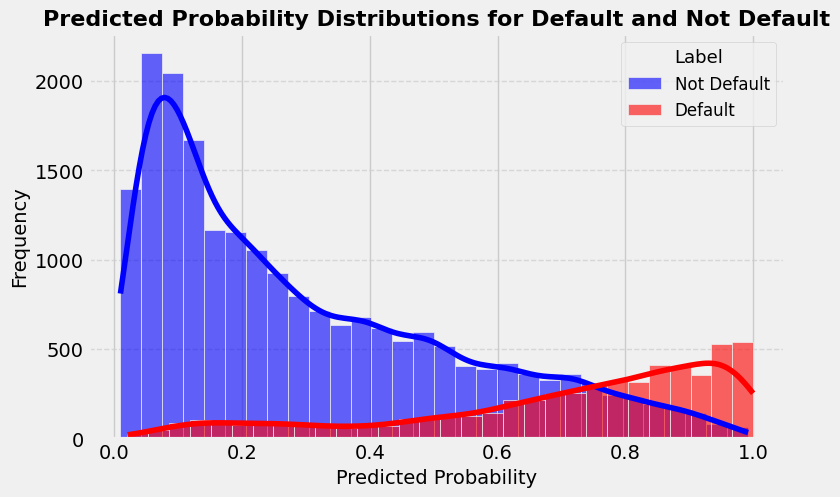

In [89]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
plot_predict_proba(y_pred_proba, y_train)

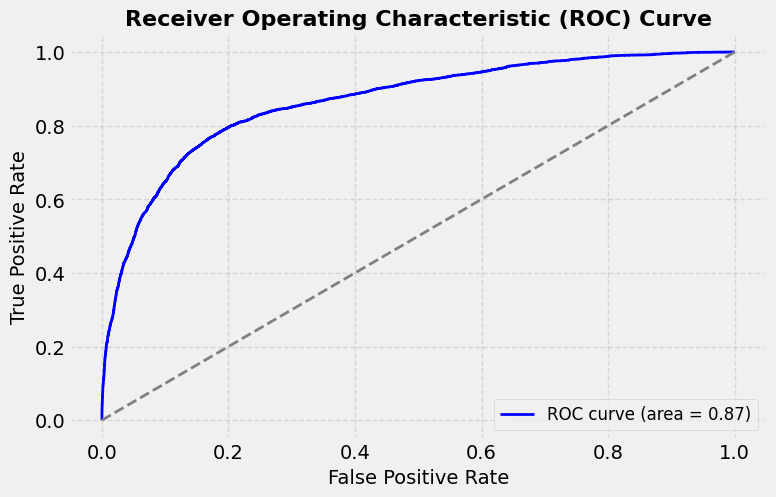

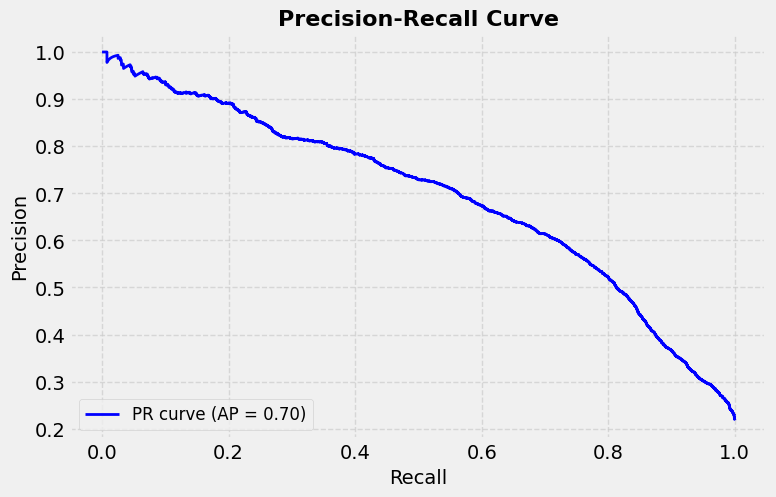

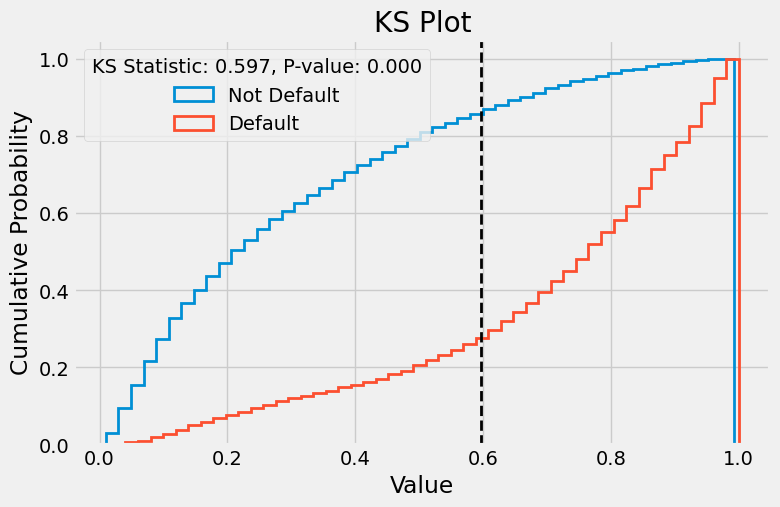

In [90]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
plot_roc_auc_curve(y_pred_proba, y_train)
plot_precision_recall_curve(y_pred_proba, y_train)
plot_ks(y_pred_proba, y_train)

# Evaluate on Testing Data

In [108]:
X_test, y_test = test_woe.drop(columns=["loan_status"]), test_woe["loan_status"]
y_pred_proba = model.predict_proba(X_test[selected_features])[:, -1]
evaluation = EvaluationMetrics(y_test, y_pred_proba)
roc_auc = evaluation.roc_auc()
roc_pr_auc = evaluation.roc_pr_auc()
gini = evaluation.gini()
ks = evaluation.ks()

print(f"AUC: {roc_auc}")
print(f"AUCPR: {roc_pr_auc}")
print(f"Gini: {gini}")
print(f"KS: {ks}")

AUC: 0.8629268235453251
AUCPR: 0.6975414108837127
Gini: 0.7258536470906503
KS: 0.5971426165858533


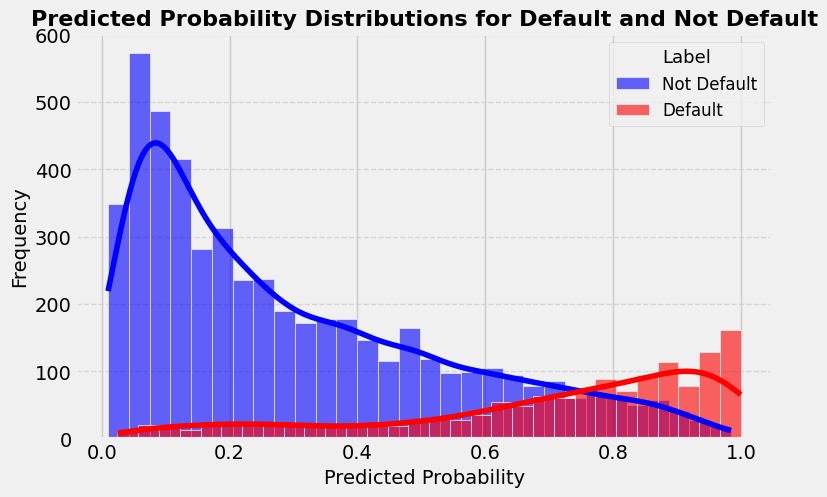

In [109]:
X_test, y_test = test_woe.drop(columns=["loan_status"]), test_woe["loan_status"]
y_pred_proba = model.predict_proba(X_test[selected_features])[:, -1]
plot_predict_proba(y_pred_proba, y_test)

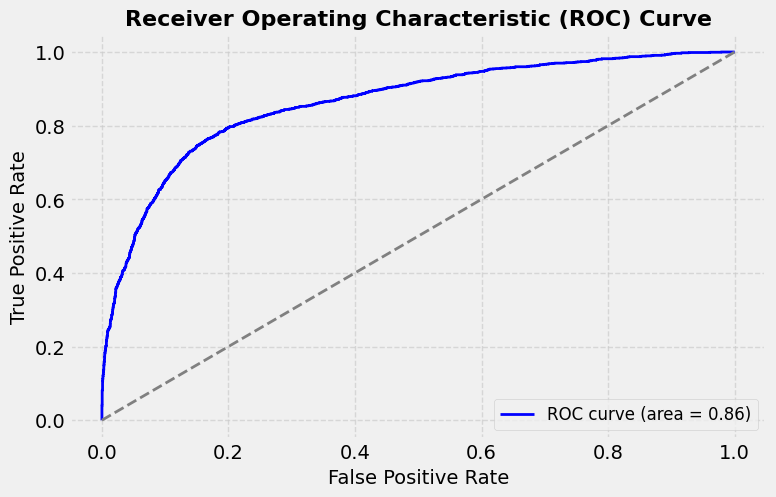

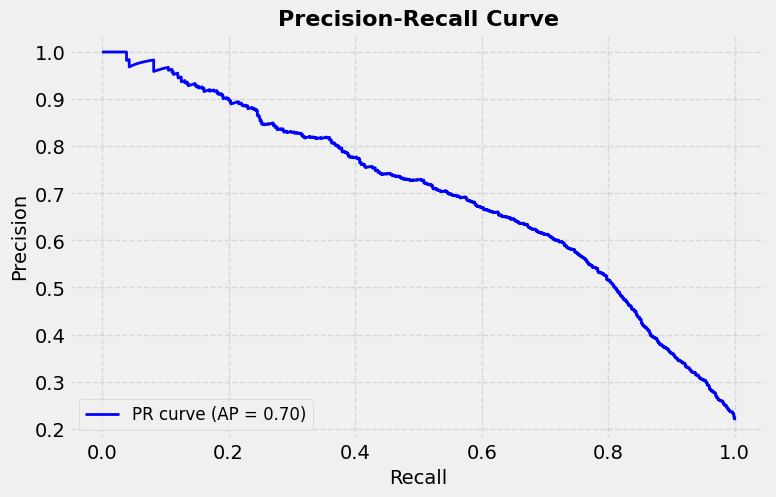

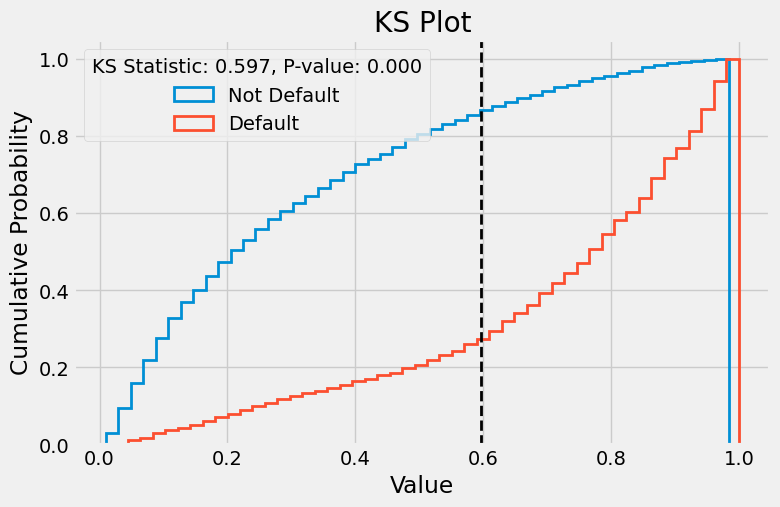

In [110]:
X_test, y_test = test_woe.drop(columns=["loan_status"]), test_woe["loan_status"]
y_pred_proba = model.predict_proba(X_test[selected_features])[:, -1]
plot_roc_auc_curve(y_pred_proba, y_test)
plot_precision_recall_curve(y_pred_proba, y_test)
plot_ks(y_pred_proba, y_test)

# Create Credit Scorecard

In [115]:
model_summary = pd.DataFrame({
    "Characteristic": selected_features,
    "Estimate": model.get_coefficient()
})

scorecards = pd.merge(
    right = woe_transformer.get_woe_df(), 
    left = model_summary,
    how = "left",
    on = ["Characteristic"]
)

scorecards

,Characteristic,Estimate,Value,WOE
0,person_age,-0.357048,"(19.999, 23.0]",-0.121524
1,person_age,-0.357048,"(23.0, 26.0]",0.020734
2,person_age,-0.357048,"(26.0, 30.0]",0.069583
3,person_age,-0.357048,"(30.0, 144.0]",0.058225
4,person_income,-0.968212,"(3999.999, 38443.25]",-0.862408
5,person_income,-0.968212,"(38443.25, 55000.0]",0.029862
6,person_income,-0.968212,"(55000.0, 79000.0]",0.319293
7,person_income,-0.968212,"(79000.0, 6000000.0]",1.009499
8,person_home_ownership,-0.751689,MORTGAGE,0.679659
9,person_home_ownership,-0.751689,OTHER,-0.549400


base_score = 1000, base_odds = 35 , pdo = 80, rate = 2

In [156]:
# Define Factor and Offset
factor = 80/np.log(2)
offset = 1000 - factor*np.log(35)

print(f"Factor = {factor:.2f} || Offset = {offset:.2f}")

Factor = 115.42 || Offset = 589.66


In [157]:
# Define n = number of characteristics
n = len(selected_features)

# Define b0
b0 = model.get_intercept()[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 9
b0 = -0.0615


In [158]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each characteristic
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards = scorecards.sort_values(by=["Characteristic", "Points"])

Credit score cards is useful for intepretability in operations of assessing creditworthines of an applicant.

In [159]:
# Create scorecard mapping
scorecard_features = scorecards["Characteristic"].unique()
scorecard_map_dict = {}

for feature in scorecard_features:
    scorecard_map_dict[feature] = scorecards[scorecards["Characteristic"]==feature].set_index("Value")["Points"].to_dict()

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [160]:
# Function used to convert customer characteristics into credit points
def get_credit_points(value: Union[int, float, str], scorecard_map_dict: dict) -> float:
    """Tranform column values into credit points.

    Args:
        value (Union[int, float, str]): column value to be mapped to credit points.
        woe_dict_map (dict): dictionary containing the conditions (keys) and credit points (values).

    Returns:
        float: WOE value.
    """
    credit_points = None
    if pd.isna(value):
        credit_points = scorecard_map_dict.get("Missing", None)
    else:
        for interval, woe in scorecard_map_dict.items():
            if isinstance(interval, pd.Interval) and value in interval:
                credit_points = woe
    return credit_points

In [161]:
# Prepare input
input_df = df.sample(5)
credit_scores_df = pd.DataFrame({})
# train
for col in input_df.select_dtypes("number").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].apply(lambda x: get_credit_points(x, scorecard_map_dict[col]))
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

for col in input_df.select_dtypes("object").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].map(scorecard_map_dict[col])
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

credit_scores_df["credit_score"] = credit_scores_df.sum(axis=1)

In [162]:
levels_decriptions = {
    0: "Blacklist",
    1: "High Risk",
    2: "Medium Risk",
    3: "Moderate Risk",
    4: "Low Risk",
    5: "Normal Credit",
    6: "Good Credit",
    7: "Excellent Credit",
    8: "Perfect Credit"
}

def get_credit_levels(
    df: pd.DataFrame,
    target_col: str = "credit_score",
    left_bound = -100,
    level_0 = 100,
    level_1 = 200,
    level_2 = 250,
    level_3 = 300,
    level_4 = 350,
    level_5 = 400,
    level_6 = 450,
    level_7 = 500,
    level_8 = 800
) -> pd.DataFrame:
    """
    Explain the credit levels and description for all credit scores.

    Args:
        df (pd.DataFrame): The dataframe containing the credit score
        target_col (str): Column containing credit score.
        left_bound (int): Lowest possible credit score.
        level_0 (int): Value where the credit scores are equal or below will be categorize as level 0.
        level_1 (int): Value where the credit scores are equal or below will be categorize as level 1.
        level_2 (int): Value where the credit scores are equal or below will be categorize as level 2.
        level_3 (int): Value where the credit scores are equal or below will be categorize as level 3.
        level_4 (int): Value where the credit scores are equal or below will be categorize as level 4.
        level_5 (int): Value where the credit scores are equal or below will be categorize as level 5.
        level_6 (int): Value where the credit scores are equal or below will be categorize as level 6.
        level_7 (int): Value where the credit scores are equal or below will be categorize as level 7.
        level_8 (int): Value where the credit scores are equal or below will be categorize as level 8.
    Returns:
        float: The dataframe containing the credit levels and descriptions for all credit scores.
    """
    levels = []
    conditions = [
        (df[target_col] > left_bound) & (df[target_col] <= level_0),
        (df[target_col] > level_0) & (df[target_col] <= level_1),
        (df[target_col] > level_1) & (df[target_col] <= level_2),
        (df[target_col] > level_2) & (df[target_col] <= level_3),
        (df[target_col] > level_3) & (df[target_col] <= level_4),
        (df[target_col] > level_4) & (df[target_col] <= level_5),
        (df[target_col] > level_5) & (df[target_col] <= level_6),
        (df[target_col] > level_6) & (df[target_col] <= level_7),
        (df[target_col] > level_7) & (df[target_col] <= level_8)
    ]

    level_choices = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    lower_bound_choices = [left_bound, level_0, level_1, level_2, level_3, level_4, level_5, level_6, level_7]
    upper_bound_choices = [level_0, level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8]
    df["credit_level"] = np.select(conditions, level_choices)
    df["credit_lower_bound"] = np.select(conditions, lower_bound_choices)
    df["credit_upper_bound"] = np.select(conditions, upper_bound_choices)
    return df

## Present Results to User/ Management

In [163]:
# Create scorecard mapping
scorecard_features = scorecards["Characteristic"].unique()
scorecard_map_dict = {}

for feature in scorecard_features:
    scorecard_map_dict[feature] = scorecards[scorecards["Characteristic"]==feature].set_index("Value")["Points"].to_dict()

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [164]:
# Function used to convert customer characteristics into credit points
def get_credit_points(value: Union[int, float, str], scorecard_map_dict: dict) -> float:
    """Tranform column values into credit points.

    Args:
        value (Union[int, float, str]): column value to be mapped to credit points.
        woe_dict_map (dict): dictionary containing the conditions (keys) and credit points (values).

    Returns:
        float: WOE value.
    """
    credit_points = None
    if pd.isna(value):
        credit_points = scorecard_map_dict.get("Missing", None)
    else:
        for interval, woe in scorecard_map_dict.items():
            if isinstance(interval, pd.Interval) and value in interval:
                credit_points = woe
    return credit_points

In [165]:
# Prepare input data
input_df = test.copy()
credit_scores_df = pd.DataFrame({})

for col in input_df.select_dtypes("number").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].apply(lambda x: get_credit_points(x, scorecard_map_dict[col]))
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

for col in input_df.select_dtypes("object").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].map(scorecard_map_dict[col])
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

credit_scores_df["credit_score"] = credit_scores_df.sum(axis=1)
credit_scores_df["credit_score"] = credit_scores_df["credit_score"].apply(lambda x: 1000 if x > 1000 else x)

In [166]:
credit_scores_df = get_credit_levels(credit_scores_df,
    target_col ='credit_score',
    left_bound = -1000,
    level_0 = 250,
    level_1 = 300,
    level_2 = 400,
    level_3 = 500,
    level_4 = 580,
    level_5 = 630,
    level_6 = 690,
    level_7 = 730,
    level_8 = 1000
)
credit_scores_df["credit_description"] = credit_scores_df["credit_level"].map(levels_decriptions)

In [167]:
report_df = credit_scores_df[["credit_score", "credit_level", "credit_lower_bound", "credit_upper_bound"]]
report_df["credit_description"] = report_df["credit_level"].map(levels_decriptions)
report_df["loan_status"] = test["loan_status"].values

C:\Users\923006079\AppData\Local\Temp\ipykernel_12628\672461742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df["credit_description"] = report_df["credit_level"].map(levels_decriptions)
C:\Users\923006079\AppData\Local\Temp\ipykernel_12628\672461742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df["loan_status"] = test["loan_status"].values


In [168]:
report_agg_df = report_df\
    .groupby(["credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description"])["loan_status"]\
    .value_counts()\
    .unstack()\
    .reset_index()\
    .rename(columns={
        0: "Not Default",
        1: "Default"
    })  # Calculate the occurence of good customers (not default) and bad customers (default)
report_agg_df = report_agg_df.rename_axis(None, axis=1)
report_agg_df["Customers"] = report_agg_df["Not Default"] + report_agg_df["Default"]
report_agg_df["Customers Rate"] = report_agg_df["Customers"] / report_agg_df["Customers"].sum() * 100  # percentage of customers exists in each credit levels
report_agg_df["Default Rate"] = report_agg_df["Default"] / report_agg_df["Customers"] * 100  # percentage of default for each credit levels
report_agg_df = report_agg_df[[
    "credit_level", "credit_lower_bound", "credit_upper_bound", 
    "credit_description", "Customers", "Customers Rate", 
    "Not Default", "Default", "Default Rate"]]\
    .rename(columns={
        "Not Default": "Good Customers", 
        "Default": "Bad Customers",
    })
report_agg_df["Reverse Cumulative Customers"] = report_agg_df["Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Good Customers"] = report_agg_df["Good Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Bad Customers"] = report_agg_df["Bad Customers"][::-1].cumsum()
report_agg_df["Good Customers Coverage"] = report_agg_df["Reverse Cumulative Good Customers"] / report_agg_df["Good Customers"].sum()  # Calculate the cumulative percentage of good customers covered from all customers
report_agg_df["Loss Coverage"] = report_agg_df["Reverse Cumulative Bad Customers"] / report_agg_df["Reverse Cumulative Customers"]  # Calculate the cumulative percentage of bad customers covered from the cumulative count of customers

With this, the management can perform calculation based on the risk they willing to take. For, example they wanted to cover at least **80% of Good Customers** and keeping **percentage of default below 10%**

In [169]:
report_agg_df[[
    "credit_level", "credit_lower_bound", "credit_upper_bound", 
    "credit_description", "Customers", "Customers Rate", 
    "Good Customers", "Bad Customers", "Default Rate",
    "Good Customers Coverage", "Loss Coverage"
]]

,credit_level,credit_lower_bound,credit_upper_bound,credit_description,Customers,Customers Rate,Good Customers,Bad Customers,Default Rate,Good Customers Coverage,Loss Coverage
0,0,-1000,250,Blacklist,251,3.851465,21,230,91.633466,1.000000,0.218199
1,1,250,300,High Risk,113,1.733927,21,92,81.415929,0.995878,0.190233
2,2,300,400,Medium Risk,391,5.999693,133,258,65.984655,0.991757,0.178775
3,3,400,500,Moderate Risk,677,10.388215,333,344,50.812408,0.965653,0.146130
4,4,500,580,Low Risk,688,10.557005,487,201,29.215116,0.900294,0.097935
5,5,580,630,Normal Credit,541,8.301366,468,73,13.493530,0.804711,0.067546
6,6,630,690,Good Credit,686,10.526316,625,61,8.892128,0.712856,0.058091
7,7,690,730,Excellent Credit,504,7.733620,456,48,9.523810,0.590186,0.051420
8,8,730,1000,Perfect Credit,2666,40.908393,2551,115,4.313578,0.500687,0.043136


## Explanation
1. Based on the Coverage Table, it would be a great idea to accept those who has **credit level of 6 to 8** to cover at least 80% of Good Customers, but the the consequence of accepting level 6 and above is the loss of almost **6.8%** of the accepted applicant.
2. Turns out you can push the limits with accepting those with at least has a **credit level of 5**/ categorize as `Low Risk` customers with the loss of **9.8%** of the accepted applicant.